# load functions and paths

In [16]:

#functions
%run '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/notebooks/00_manuscript/paths.py'
%run '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/notebooks/00_manuscript/utilities.py'
%run '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/notebooks/00_manuscript/spectrogramming.py'
%run '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/notebooks/00_manuscript/segmentation.py'
%run '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/notebooks/00_manuscript/features_acoustic.py'

#paths to raw data
all_wav_raw = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/'
all_wav_bw_po_cf = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_cf/'
all_wav_bw_po_f1 = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f1/'
all_wav_bw_po_f2 = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/'

#paths to clips for developmental dataset
all_voc_clips_dirs = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips'
all_bg_clips_dirs = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/background_clips/'

#root directory for all of the segments (start and stop times)
segments_root = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/'
clips_root = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/'

#csv of annotated segments (start and stop times) from the development dataset
test_set_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/annotated/annotations_csv/all_annotations.csv'

# check file names

In [5]:
#get any file names with problems (either wrong number of components or components in wrong order)
bad_lengths, wrong_order = check_file_names(all_wav_bw_po_f2)

print('bad lengths...')
for i in bad_lengths: print(i)
    
print('wrong order...')
for i in wrong_order: print(i)

# check sample sizes

In [144]:
#get the meta data associated with each file name
df = get_meta_data(all_wav_raw)

#show how many breeding pairs and litters there are for each species
ages = [1, 3, 5, 7, 9, 11, 13]
species_list = ['BK', 'BW', 'MU', 'NB', 'IS', 'SW', 'LL', 'GO', 'LO', 'PO', 'MZ']
for species in species_list:
    for age in ages:
        dates = len(df['date'].loc[df['species'] == species].loc[df['age'] == age].unique())
        litters = len(df['parents'].loc[df['species'] == species].loc[df['age'] == age].unique())
        pups = len(df.loc[df['species'] == species].loc[df['age'] == age])
        print(species, '...', age, ':', litters, ':', pups)

BK ... 1 : 3 : 15
BK ... 3 : 3 : 15
BK ... 5 : 2 : 4
BK ... 7 : 2 : 18
BK ... 9 : 3 : 12
BK ... 11 : 3 : 18
BK ... 13 : 2 : 16
BW ... 1 : 3 : 11
BW ... 3 : 3 : 14
BW ... 5 : 3 : 11
BW ... 7 : 3 : 10
BW ... 9 : 3 : 9
BW ... 11 : 2 : 12
BW ... 13 : 2 : 13
MU ... 1 : 3 : 17
MU ... 3 : 3 : 21
MU ... 5 : 2 : 13
MU ... 7 : 2 : 19
MU ... 9 : 2 : 13
MU ... 11 : 3 : 17
MU ... 13 : 2 : 16
NB ... 1 : 3 : 13
NB ... 3 : 3 : 12
NB ... 5 : 3 : 6
NB ... 7 : 3 : 7
NB ... 9 : 3 : 10
NB ... 11 : 3 : 14
NB ... 13 : 3 : 10
IS ... 1 : 0 : 0
IS ... 3 : 1 : 2
IS ... 5 : 1 : 3
IS ... 7 : 1 : 1
IS ... 9 : 1 : 4
IS ... 11 : 1 : 1
IS ... 13 : 1 : 1
SW ... 1 : 2 : 14
SW ... 3 : 3 : 5
SW ... 5 : 2 : 8
SW ... 7 : 2 : 4
SW ... 9 : 3 : 16
SW ... 11 : 3 : 9
SW ... 13 : 3 : 17
LL ... 1 : 2 : 3
LL ... 3 : 3 : 5
LL ... 5 : 3 : 8
LL ... 7 : 3 : 14
LL ... 9 : 6 : 15
LL ... 11 : 4 : 10
LL ... 13 : 3 : 8
GO ... 1 : 3 : 10
GO ... 3 : 3 : 8
GO ... 5 : 3 : 7
GO ... 7 : 3 : 9
GO ... 9 : 4 : 16
GO ... 11 : 3 : 10
GO ... 13 : 3 : 8

# segment the audio using amplitude thresholding

## spot check audio durations

In [66]:
#show the durations of all wav files

raw_dir = all_wav_bw_po_f2

#root is the absolute path to the experiment folder
wav_paths = [raw_dir +i for i in os.listdir(raw_dir) if i.endswith('.wav') and not i.startswith('.')]

durations = []
names = []
for wav_path in tqdm(wav_paths): 
    fs, wav = wavfile.read(wav_path)
    names.append(wav_path.split('/')[-1])
    durations.append(len(wav)/fs)
    
durdf = pd.DataFrame()
durdf['duration_s'] = durations
durdf['source_file'] = names


  0%|                                                                                                                                                          | 0/1237 [00:00<?, ?it/s]/n/home10/jourjine/.conda/envs/manuscript/lib/python3.7/site-packages/ipykernel_launcher.py:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  # This is added back by InteractiveShellApp.init_path()
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1237/1237 [20:45<00:00,  1.01s/it]


<AxesSubplot:xlabel='duration_s', ylabel='Count'>

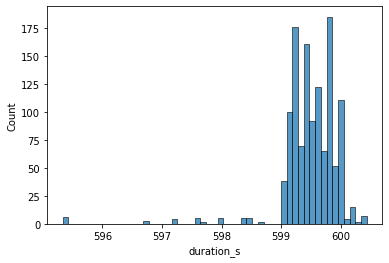

In [67]:
#spot check
%matplotlib inline
sns.histplot(durdf['duration_s'])

## amplitude segmentation

### set the segmenting parameters

In [69]:
#choose the parameters
thresholds_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/noise/all_noise_floors.csv'
seg_params = {
    'min_freq': 20e3, # minimum frequency
    'max_freq': 125e3, # maximum frequency
    'nperseg': 1024, # FFT
    'noverlap': 1024//2, # FFT
    'spec_min_val': .8, # minimum log-spectrogram value
    'spec_max_val': 6, # maximum log-spectrogram value
    'fs': 250000, # audio samplerate
    'th_1':.3, # segmenting threshold 1
    'th_2':.3, # segmenting threshold 2
    'th_3':.35, # segmenting threshold 3
    'min_dur':0.015, # minimum syllable duration
    'max_dur': 1, # maximum syllable duration
    'min_intersyllable': .004,
    'smoothing_timescale': 0.00025, # amplitude
    'softmax': False, # apply softmax to the frequency bins to calculate
                      # amplitude
    'temperature':0.01, # softmax temperature parameter
    'thresholds_path': None,
    'algorithm': '<function get_onsets_offsets at 0x7f944cc355f0>', # (defined above)
}


#name them
dataset = 'bw_po_f2'
iteration = get_date_time()
params_save_name = ('_').join([dataset,iteration])
params_save_dir = os.path.join(segments_root,dataset,'amplitude_segmentation',iteration,'00_params')+'/'

#make directories for them
if iteration not in os.listdir(os.path.join(segments_root,dataset)):
    path_to_make = os.path.join(segments_root,dataset,'amplitude_segmentation',iteration)
    os.mkdir(path_to_make)
    print('making this directory:\n\t', path_to_make)
    
if '00_params' not in os.listdir(os.path.join(segments_root,dataset,'amplitude_segmentation',iteration)):
    path_to_make = os.path.join(segments_root,dataset,'amplitude_segmentation',iteration,'00_params')
    os.mkdir(path_to_make)
    print('making this directory:\n\t', path_to_make)

#save them
assert os.path.exists(params_save_dir)
assert params_save_dir.endswith('/')
save_parameters(params = seg_params, 
                save_dir = params_save_dir, 
                save_name = params_save_name)



making this directory:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/bw_po_f2/amplitude_segmentation/20220921_040238
making this directory:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/bw_po_f2/amplitude_segmentation/20220921_040238/00_params
making a new params file...
saved the params file to:
 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/bw_po_f2/amplitude_segmentation/20220921_040238/00_params/bw_po_f2_20220921_040238


### segment

In [76]:
#get raw audio to segment
dataset = dataset
raw_dir = all_wav_bw_po_f2

#if the dataset is bw_po_f2, ensure that the corrupted unsegmented files aren't in raw_dir
unsegmentable = ['ch8_BWxPO-cross-F2_26878x27490_fam-D3_ltr6_pup4_ch8_4700_f_333_298_fr0_p9_2021-04-16_15-26-07.wav',
                 'ch8_BWxPO-cross-F2_26878x27490_fam-D3_ltr6_pup7_ch8_3800_f_338_285_fr0_p7_2021-04-14_17-27-18.wav',
                 'ch8_BWxPO-cross-F2_27404x27407_fam-A7_ltr1_pup7_ch8_4200_m_328_275_fr1_p7_2021-01-05_13-47-10.wav']

for i in unsegmentable:
    assert i not in os.listdir(raw_dir)

#specify the directory where segment csvs will be saved
save_dir = os.path.join(segments_root,dataset,'amplitude_segmentation',iteration)

#load the params and make sure everything looks ok
print('\ndata set is:\n\t',dataset, '\n')

seg_params = load_parameters(save_dir = params_save_dir, 
                             save_name = params_save_name)
print('\nthey are:\n')
for key in seg_params.keys():
    print('\t',key,':',seg_params[key])

print('\nstart and stop times will be identified in raw wav files here:\n\t', raw_dir)
print('\nand saved here:\n\t', save_dir)
    
val = input('everything look ok for segmenting? y/n')
assert val in ['y','n']
if val == 'n':
    print('ok - doing nothing')
elif val == 'y':
    get_amplitude_segments(audio_dir = raw_dir, 
                           save_dir = save_dir, 
                           seg_params = seg_params, 
                           species = None, 
                           thresholds_path = seg_params['thresholds_path'],
                           intersyll_threshold = seg_params['min_intersyllable'], 
                           duration_threshold = seg_params['min_dur'])




data set is:
	 bw_po_f2 

loaded parameters from:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/bw_po_f2/amplitude_segmentation/20220921_040238/00_params/bw_po_f2_20220921_040238

they are:

	 min_freq : 20000.0
	 max_freq : 125000.0
	 nperseg : 1024
	 noverlap : 512
	 spec_min_val : 0.8
	 spec_max_val : 6
	 fs : 250000
	 th_1 : 0.3
	 th_2 : 0.3
	 th_3 : 0.35
	 min_dur : 0.015
	 max_dur : 1
	 min_intersyllable : 0.004
	 smoothing_timescale : 0.00025
	 softmax : False
	 temperature : 0.01
	 thresholds_path : None
	 algorithm : <function get_onsets_offsets at 0x7f944cc355f0>

start and stop times will be identified in raw wav files here:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

and saved here:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/bw_po_f2/amplitude_segmentation/20220921_040238
everything look ok for segmenting? y/ny
Segmenting everything...
Segmenting WITHOUT per recording noise floors...
322 recordings have

SEGMENTING... ch5_BWxPO-cross-F2_26366x26370_fam-A5_ltr4_pup4_ch5_3100_f_346_283_fr0_p7_2021-04-04_14-40-31.wav
spec_min_val is 0.8
getting maxima
...no vocalizations found
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch8_BWxPO-cross-F2_27490x26878_fam-D3_ltr1_pup6_ch8_4800_f_338_301_fr0_p9_2020-10-23_12-43-23.wav
DONE WITH... ch8_BWxPO-cross-F2_27490x26878_fam-D3_ltr1_pup6_ch8_4800_f_338_301_fr0_p9_2020-10-23_12-43-23
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28206x28208_fam-D4_ltr3_pup1_ch3_4100_m_347_308_fr0_p9_2021-03-29_17-36-12.wav
DONE WITH... ch3_BWxPO-cross-F2_28206x28208_fam-D4_ltr3_pup1_ch3_4100_m_347_308_fr0_p9_2021-03-29_17-36-12
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_28206x28208_fam-D4_ltr1_pup1_ch2_3000_f_344_285_fr0_p7_2020-11-10_13-46-07.wav
DONE WITH... ch2_BWxPO-cross-F2_28206x28208_fam-D4_ltr1_pup1_ch2_3000_f_344_285_fr0_p7_2020-11-10_13-46-07
/n/hoeks

SEGMENTING... ch3_BWxPO-cross-F2_26159x26161_fam-A3_ltr4_pup2_ch3_3100_m_346_298_fr0_p7_2021-01-26_17-13-17.wav
spec_min_val is 0.8
getting maxima
...no vocalizations found
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_28207x28209_fam-D5_ltr5_pup4_ch5_4300_m_347_289_fr0_p7_2021-04-14_18-00-14.wav
DONE WITH... ch5_BWxPO-cross-F2_28207x28209_fam-D5_ltr5_pup4_ch5_4300_m_347_289_fr0_p7_2021-04-14_18-00-14
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr2_pup4_ch5_3300_f_345_312_fr1_p7_2021-01-23_15-46-49.wav
DONE WITH... ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr2_pup4_ch5_3300_f_345_312_fr1_p7_2021-01-23_15-46-49
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28978x28979_fam-A10_ltr5_pup1_ch3_4100_m_346_286_fr0_p9_2021-05-10_15-48-59.wav
DONE WITH... ch3_BWxPO-cross-F2_28978x28979_fam-A10_ltr5_pup1_ch3_4100_m_346_286_fr0_p9_2021-05-10_15-48-59
/n/hoe

SEGMENTING... ch2_BWxPO-cross-F2_28134x28136_fam-A8_ltr3_pup1_ch2_2600_m_352_263_fr0_p7_2021-02-17_13-17-35.wav
spec_min_val is 0.8
getting maxima
...no vocalizations found
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28207x28209_fam-D5_ltr5_pup3_ch3_4200_m_343_309_fr0_p9_2021-04-16_17-12-46.wav
DONE WITH... ch3_BWxPO-cross-F2_28207x28209_fam-D5_ltr5_pup3_ch3_4200_m_343_309_fr0_p9_2021-04-16_17-12-46
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_26366x26370_fam-A5_ltr3_pup4_ch5_3900_f_343_271_fr1_p7_2021-03-11_15-15-55.wav
DONE WITH... ch5_BWxPO-cross-F2_26366x26370_fam-A5_ltr3_pup4_ch5_3900_f_343_271_fr1_p7_2021-03-11_15-15-55
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_28207x28209_fam-D5_ltr4_pup3_ch4_3300_m_360_298_fr0_p7_2021-03-19_14-06-11.wav
DONE WITH... ch4_BWxPO-cross-F2_28207x28209_fam-D5_ltr4_pup3_ch4_3300_m_360_298_fr0_p7_2021-03-19_14-06-11
/n/hoeks

SEGMENTING... ch4_BWxPO-cross-F2_28339x28341_fam-A9_ltr9_pup4_ch4_5300_m_325_292_fr0_p9_2021-07-12_14-18-27.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 682 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch7_BWxPO-cross-F2_26878x27490_fam-D3_ltr3_pup1_ch7_5100_f_332_306_fr0_p9_2021-02-01_17-47-10.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch7_BWxPO-cross-F2_26878x27490_fam-D3_ltr3_pup1_ch7_5100_f_332_306_fr0_p9_2021-02-01_17-47-10.wav
SEGMENTING... ch7_BWxPO-cross-F2_26878x27490_fam-D3_ltr3_pup1_ch7_5100_f_332_306_fr0_p9_2021-02-01_17-47-10.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 126 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch4_BWxPO-cross-F2_28207x28209_fam-D5_ltr6_pup3_ch4_3800_f_355_305_fr0_p7_2021-05-10_16-35-22.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 221 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch6_BWxPO-cross-F2_28316x28134_fam-A8_ltr1_pup4_ch6_5300_f_338_317_fr0_p9_2020-11-13_16-06-24.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch6_BWxPO-cross-F2_28316x28134_fam-A8_ltr1_pup4_ch6_5300_f_338_317_fr0_p9_2020-11-13_16-06-24.wav
SEGMENTING... ch6_BWxPO-cross-F2_28316x28134_fam-A8_ltr1_pup4_ch6_5300_f_338_317_fr0_p9_2020-11-13_16-06-24.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 331 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch6_BWxPO-cross-F2_26158x26160_fam-A4_ltr8_pup5_ch6_3900_m_336_270_fr0_p7_2021-06-19_16-12-04.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 16 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_27732x27733_fam-B5_ltr7_pup2_ch3_1900_m_341_275_fr1_p7_2021-06-15_13-20-38.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_27732x27733_fam-B5_ltr7_pup2_ch3_1900_m_341_275_fr1_p7_2021-06-15_13-20-38.wav
SEGMENTING... ch3_BWxPO-cross-F2_27732x27733_fam-B5_ltr7_pup2_ch3_1900_m_341_275_fr1_p7_2021-06-15_13-20-38.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 34 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch

SEGMENTING... ch2_BWxPO-cross-F2_28978x28979_fam-A10_ltr6_pup2_ch2_4300_f_338_317_fr0_p9_2021-07-01_13-02-04.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 98 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr4_pup5_ch5_4700_m_346_303_fr1_p9_2021-03-15_18-10-19.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr4_pup5_ch5_4700_m_346_303_fr1_p9_2021-03-15_18-10-19.wav
SEGMENTING... ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr4_pup5_ch5_4700_m_346_303_fr1_p9_2021-03-15_18-10-19.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 9 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch

SEGMENTING... ch4_BWxPO-cross-F2_25704x25707_fam-A1_ltr1_pup2_ch4_4300_f_361_306_fr0_p7_2020-01-17_14-00-16.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 371 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_26158x26160_fam-A4_ltr3_pup1_ch2_3900_m_361_291_fr0_p7_2021-02-15_16-57-07.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_26158x26160_fam-A4_ltr3_pup1_ch2_3900_m_361_291_fr0_p7_2021-02-15_16-57-07.wav
SEGMENTING... ch2_BWxPO-cross-F2_26158x26160_fam-A4_ltr3_pup1_ch2_3900_m_361_291_fr0_p7_2021-02-15_16-57-07.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 84 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/c

SEGMENTING... ch3_BWxPO-cross-F2_27004x27488_fam-D1_ltr6_pup1_ch3_4900_m_323_299_fr0_p9_2021-04-20_13-02-50.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 509 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_26366x26370_fam-A5_ltr3_pup3_ch4_4800_m_343_298_fr1_p9_2021-03-13_13-21-15.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_26366x26370_fam-A5_ltr3_pup3_ch4_4800_m_343_298_fr1_p9_2021-03-13_13-21-15.wav
SEGMENTING... ch4_BWxPO-cross-F2_26366x26370_fam-A5_ltr3_pup3_ch4_4800_m_343_298_fr1_p9_2021-03-13_13-21-15.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 885 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch3_BWxPO-cross-F2_26158x26160_fam-A4_ltr3_pup2_ch3_2500_f_356_271_fr0_p7_2021-02-15_16-57-07.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 256 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_28136x28134_fam-A8_ltr1_pup2_ch4_2800_m_344_270_fr0_p7_2020-11-11_13-31-20.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_28136x28134_fam-A8_ltr1_pup2_ch4_2800_m_344_270_fr0_p7_2020-11-11_13-31-20.wav
SEGMENTING... ch4_BWxPO-cross-F2_28136x28134_fam-A8_ltr1_pup2_ch4_2800_m_344_270_fr0_p7_2020-11-11_13-31-20.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 64 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/c

SEGMENTING... ch7_BWxPO-cross-F2_27004x27488_fam-D1_ltr4_pup3_ch7_4200_m_346_305_fr0_p9_2021-02-27_14-35-44.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 150 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_28457x28458_fam-D6_ltr2_pup3_ch4_4300_m_364_319_fr0_p7_2021-02-11_14-01-26.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_28457x28458_fam-D6_ltr2_pup3_ch4_4300_m_364_319_fr0_p7_2021-02-11_14-01-26.wav
SEGMENTING... ch4_BWxPO-cross-F2_28457x28458_fam-D6_ltr2_pup3_ch4_4300_m_364_319_fr0_p7_2021-02-11_14-01-26.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 192 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch3_BWxPO-cross-F2_28339x28341_fam-A9_ltr3_pup2_ch3_4200_f_350_304_fr1_p7_2021-02-15_17-34-59.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 81 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_27004x27488_fam-D1_ltr4_pup2_ch3_2700_m_355_299_fr0_p7_2021-02-25_15-15-51.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_27004x27488_fam-D1_ltr4_pup2_ch3_2700_m_355_299_fr0_p7_2021-02-25_15-15-51.wav
SEGMENTING... ch3_BWxPO-cross-F2_27004x27488_fam-D1_ltr4_pup2_ch3_2700_m_355_299_fr0_p7_2021-02-25_15-15-51.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 44 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch

SEGMENTING... ch5_BWxPO-cross-F2_26159x26161_fam-A3_ltr1_pup3_ch5_3400_f_343_291_fr0_p7_2020-03-05_12-47-28.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 585 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_28457x28458_fam-D6_ltr7_pup4_ch5_4100_f_343_285_fr0_p7_2021-06-16_16-33-29.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_28457x28458_fam-D6_ltr7_pup4_ch5_4100_f_343_285_fr0_p7_2021-06-16_16-33-29.wav
SEGMENTING... ch5_BWxPO-cross-F2_28457x28458_fam-D6_ltr7_pup4_ch5_4100_f_343_285_fr0_p7_2021-06-16_16-33-29.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 1160 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2

SEGMENTING... ch2_BWxPO-cross-F2_27405x27406_fam-A6_ltr5_pup1_ch2_4000_m_345_283_fr0_p7_2021-03-30_13-41-45.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 688 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch6_BWxPO-cross-F2_26878x27490_fam-D3_ltr2_pup5_ch6_3800_f_341_320_fr0_p9_2021-01-07_17-05-59.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch6_BWxPO-cross-F2_26878x27490_fam-D3_ltr2_pup5_ch6_3800_f_341_320_fr0_p9_2021-01-07_17-05-59.wav
SEGMENTING... ch6_BWxPO-cross-F2_26878x27490_fam-D3_ltr2_pup5_ch6_3800_f_341_320_fr0_p9_2021-01-07_17-05-59.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 40 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/c

SEGMENTING... ch2_BWxPO-cross-F2_26879x27489_fam-D2_ltr7_pup1_ch2_3400_f_349_289_fr0_p7_2021-05-27_15-45-23.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 97 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch7_BWxPO-cross-F2_28136x28134_fam-A8_ltr1_pup5_ch7_4300_m_340_296_fr1_p7_2020-11-11_13-31-20.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch7_BWxPO-cross-F2_28136x28134_fam-A8_ltr1_pup5_ch7_4300_m_340_296_fr1_p7_2020-11-11_13-31-20.wav
SEGMENTING... ch7_BWxPO-cross-F2_28136x28134_fam-A8_ltr1_pup5_ch7_4300_m_340_296_fr1_p7_2020-11-11_13-31-20.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 586 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/c

SEGMENTING... ch7_BWxPO-cross-F2_26878x27490_fam-D3_ltr6_pup6_ch7_3500_m_343_282_fr0_p7_2021-04-14_17-27-18.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 221 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_27212x27213_fam-B4_ltr5_pup1_ch2_4800_f_340_317_fr0_p9_2021-05-09_12-51-39.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_27212x27213_fam-B4_ltr5_pup1_ch2_4800_f_340_317_fr0_p9_2021-05-09_12-51-39.wav
SEGMENTING... ch2_BWxPO-cross-F2_27212x27213_fam-B4_ltr5_pup1_ch2_4800_f_340_317_fr0_p9_2021-05-09_12-51-39.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 747 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch3_BWxPO-cross-F2_28693x28694_fam-D8_ltr4_pup2_ch3_4000_f_343_309_fr0_p7_2021-04-12_18-16-11.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 105 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_28693x28694_fam-D8_ltr7_pup1_ch2_4300_m_350_270_fr0_p7_2021-07-05_14-53-11.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_28693x28694_fam-D8_ltr7_pup1_ch2_4300_m_350_270_fr0_p7_2021-07-05_14-53-11.wav
SEGMENTING... ch2_BWxPO-cross-F2_28693x28694_fam-D8_ltr7_pup1_ch2_4300_m_350_270_fr0_p7_2021-07-05_14-53-11.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 831 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch5_BWxPO-cross-F2_28456x28459_fam-D7_ltr2_pup4_ch5_3700_f_356_297_fr1_p7_2021-02-10_18-18-34.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 621 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28456x28459_fam-D7_ltr5_pup2_ch3_4200_m_348_276_fr0_p9_2021-05-03_16-00-53.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28456x28459_fam-D7_ltr5_pup2_ch3_4200_m_348_276_fr0_p9_2021-05-03_16-00-53.wav
SEGMENTING... ch3_BWxPO-cross-F2_28456x28459_fam-D7_ltr5_pup2_ch3_4200_m_348_276_fr0_p9_2021-05-03_16-00-53.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 500 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch2_BWxPO-cross-F2_26158x26160_fam-A4_ltr6_pup1_ch2_3500_m_360_315_fr0_p7_2021-05-02_14-26-37.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 192 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_26158x26160_fam-A4_ltr4_pup2_ch2_5000_m_349_315_fr1_p9_2021-03-15_18-10-19.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_26158x26160_fam-A4_ltr4_pup2_ch2_5000_m_349_315_fr1_p9_2021-03-15_18-10-19.wav
SEGMENTING... ch2_BWxPO-cross-F2_26158x26160_fam-A4_ltr4_pup2_ch2_5000_m_349_315_fr1_p9_2021-03-15_18-10-19.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 444 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch2_BWxPO-cross-F2_26158x26160_fam-A4_ltr6_pup2_ch2_4200_m_344_301_fr0_p9_2021-05-04_13-48-27.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 34 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch7_BWxPO-cross-F2_26879x27489_fam-D2_ltr9_pup6_ch7_3100_m_325_284_fr0_p7_2021-07-15_13-51-56.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch7_BWxPO-cross-F2_26879x27489_fam-D2_ltr9_pup6_ch7_3100_m_325_284_fr0_p7_2021-07-15_13-51-56.wav
SEGMENTING... ch7_BWxPO-cross-F2_26879x27489_fam-D2_ltr9_pup6_ch7_3100_m_325_284_fr0_p7_2021-07-15_13-51-56.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 204 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/c

SEGMENTING... ch3_BWxPO-cross-F2_26878x27490_fam-D3_ltr4_pup2_ch3_4100_m_351_316_fr0_p7_2021-02-24_14-03-17.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 15 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_26158x26160_fam-A4_ltr6_pup3_ch4_3600_m_342_311_fr0_p7_2021-05-02_14-26-37.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_26158x26160_fam-A4_ltr6_pup3_ch4_3600_m_342_311_fr0_p7_2021-05-02_14-26-37.wav
SEGMENTING... ch4_BWxPO-cross-F2_26158x26160_fam-A4_ltr6_pup3_ch4_3600_m_342_311_fr0_p7_2021-05-02_14-26-37.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 63 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch

SEGMENTING... ch2_BWxPO-cross-F2_28456x28459_fam-D7_ltr6_pup2_ch2_4000_f_330_304_fr0_p9_2021-05-30_15-39-10.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 202 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28134x28136_fam-A8_ltr4_pup4_ch3_4700_f_340_313_fr0_p9_2021-03-17_17-12-05.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28134x28136_fam-A8_ltr4_pup4_ch3_4700_f_340_313_fr0_p9_2021-03-17_17-12-05.wav
SEGMENTING... ch3_BWxPO-cross-F2_28134x28136_fam-A8_ltr4_pup4_ch3_4700_f_340_313_fr0_p9_2021-03-17_17-12-05.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 176 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch3_BWxPO-cross-F2_27005x27489_fam-D2_ltr2_pup2_ch3_4300_f_337_321_fr0_p9_2020-11-18_14-31-06.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 295 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_25704x25707_fam-A1_ltr3_pup1_ch2_4200_m_345_281_fr0_p7_2020-09-16_12-47-17.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_25704x25707_fam-A1_ltr3_pup1_ch2_4200_m_345_281_fr0_p7_2020-09-16_12-47-17.wav
SEGMENTING... ch2_BWxPO-cross-F2_25704x25707_fam-A1_ltr3_pup1_ch2_4200_m_345_281_fr0_p7_2020-09-16_12-47-17.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 512 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch2_BWxPO-cross-F2_27732x27733_fam-B5_ltr6_pup1_ch2_4000_m_355_302_fr0_p7_2021-05-22_13-49-11.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 54 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28457x28458_fam-D6_ltr8_pup2_ch3_4500_f_363_308_fr0_p7_2021-07-10_16-49-27.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28457x28458_fam-D6_ltr8_pup2_ch3_4500_f_363_308_fr0_p7_2021-07-10_16-49-27.wav
SEGMENTING... ch3_BWxPO-cross-F2_28457x28458_fam-D6_ltr8_pup2_ch3_4500_f_363_308_fr0_p7_2021-07-10_16-49-27.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 169 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/c

SEGMENTING... ch2_BWxPO-cross-F2_28134x28136_fam-A8_ltr3_pup4_ch2_4800_m_351_295_fr1_p9_2021-02-19_13-08-31.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 13 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr4_pup4_ch5_3200_f_360_305_fr0_p7_2021-03-13_18-18-07.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr4_pup4_ch5_3200_f_360_305_fr0_p7_2021-03-13_18-18-07.wav
SEGMENTING... ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr4_pup4_ch5_3200_f_360_305_fr0_p7_2021-03-13_18-18-07.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 113 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/c

SEGMENTING... ch2_BWxPO-cross-F2_28339x28341_fam-A9_ltr5_pup1_ch2_4600_m_338_318_fr0_p9_2021-04-07_12-36-49.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 254 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_27404x27407_fam-A7_ltr3_pup4_ch5_3600_f_348_296_fr1_p7_2021-02-24_13-28-48.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_27404x27407_fam-A7_ltr3_pup4_ch5_3600_f_348_296_fr1_p7_2021-02-24_13-28-48.wav
SEGMENTING... ch5_BWxPO-cross-F2_27404x27407_fam-A7_ltr3_pup4_ch5_3600_f_348_296_fr1_p7_2021-02-24_13-28-48.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 154 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch2_BWxPO-cross-F2_26874x27489_fam-D2_ltr8_pup2_ch2_4300_f_328_317_fr0_p9_2021-06-24_19-44-12.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 486 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_28134x28136_fam-A8_ltr4_pup1_ch2_3200_f_353_290_fr0_p7_2021-03-15_17-31-53.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_28134x28136_fam-A8_ltr4_pup1_ch2_3200_f_353_290_fr0_p7_2021-03-15_17-31-53.wav
SEGMENTING... ch2_BWxPO-cross-F2_28134x28136_fam-A8_ltr4_pup1_ch2_3200_f_353_290_fr0_p7_2021-03-15_17-31-53.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 7 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch

SEGMENTING... ch3_BWxPO-cross-F2_29614x29615_fam-D10_ltr2_pup2_ch3_4600_m_354_271_fr0_p7_2021-05-26_15-19-51.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 435 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_26159x26161_fam-A3_ltr8_pup3_ch2_5400_m_347_307_fr1_p9_2021-05-27_12-56-57.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_26159x26161_fam-A3_ltr8_pup3_ch2_5400_m_347_307_fr1_p9_2021-05-27_12-56-57.wav
SEGMENTING... ch2_BWxPO-cross-F2_26159x26161_fam-A3_ltr8_pup3_ch2_5400_m_347_307_fr1_p9_2021-05-27_12-56-57.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 582 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2

SEGMENTING... ch4_BWxPO-cross-F2_26878x27490_fam-D3_ltr6_pup6_ch4_4200_m_341_305_fr0_p9_2021-04-16_15-26-07.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 128 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_27004x27488_fam-D1_ltr2_pup4_ch5_2800_m_357_291_fr1_p7_2021-01-05_15-10-51.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_27004x27488_fam-D1_ltr2_pup4_ch5_2800_m_357_291_fr1_p7_2021-01-05_15-10-51.wav
SEGMENTING... ch5_BWxPO-cross-F2_27004x27488_fam-D1_ltr2_pup4_ch5_2800_m_357_291_fr1_p7_2021-01-05_15-10-51.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 170 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch7_BWxPO-cross-F2_26879x27489_fam-D2_ltr6_pup6_ch7_4300_f_333_304_fr0_p9_2021-04-10_15-23-05.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 291 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr5_pup1_ch2_4600_m_351_287_fr0_p7_2021-03-24_14-19-11.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr5_pup1_ch2_4600_m_351_287_fr0_p7_2021-03-24_14-19-11.wav
SEGMENTING... ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr5_pup1_ch2_4600_m_351_287_fr0_p7_2021-03-24_14-19-11.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 254 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch3_BWxPO-cross-F2_28693x28694_fam-D8_ltr6_pup2_ch3_4300_f_336_307_fr0_p9_2021-06-09_14-58-09.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 788 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_28339x28341_fam-A9_ltr9_pup4_ch5_4400_m_351_277_fr0_p7_2021-07-10_16-21-40.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_28339x28341_fam-A9_ltr9_pup4_ch5_4400_m_351_277_fr0_p7_2021-07-10_16-21-40.wav
SEGMENTING... ch5_BWxPO-cross-F2_28339x28341_fam-A9_ltr9_pup4_ch5_4400_m_351_277_fr0_p7_2021-07-10_16-21-40.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 44 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/c

SEGMENTING... ch2_BWxPO-cross-F2_28457x28458_fam-D6_ltr7_pup1_ch2_4000_f_353_294_fr0_p7_2021-06-16_16-33-29.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 469 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28457x28458_fam-D6_ltr4_pup4_ch3_6100_m_341_317_fr0_p9_2021-04-05_18-08-24.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28457x28458_fam-D6_ltr4_pup4_ch3_6100_m_341_317_fr0_p9_2021-04-05_18-08-24.wav
SEGMENTING... ch3_BWxPO-cross-F2_28457x28458_fam-D6_ltr4_pup4_ch3_6100_m_341_317_fr0_p9_2021-04-05_18-08-24.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 683 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch2_BWxPO-cross-F2_28341x28339_fam-A9_ltr1_pup1_ch2_7300_m_331_337_fr0_p9_2020-11-12_13-37-52.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 501 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_29462x29463_fam-D12_ltr2_pup3_ch4_3900_m_349_292_fr0_p7_2021-05-24_16-14-48.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_29462x29463_fam-D12_ltr2_pup3_ch4_3900_m_349_292_fr0_p7_2021-05-24_16-14-48.wav
SEGMENTING... ch4_BWxPO-cross-F2_29462x29463_fam-D12_ltr2_pup3_ch4_3900_m_349_292_fr0_p7_2021-05-24_16-14-48.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 106 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_

SEGMENTING... ch2_BWxPO-cross-F2_27212x27213_fam-B4_ltr4_pup2_ch2_4600_m_339_300_fr0_p9_2021-04-10_16-58-47.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 931 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28456x28459_fam-D7_ltr4_pup4_ch3_4600_m_334_301_fr0_p9_2021-04-06_17-23-14.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28456x28459_fam-D7_ltr4_pup4_ch3_4600_m_334_301_fr0_p9_2021-04-06_17-23-14.wav
SEGMENTING... ch3_BWxPO-cross-F2_28456x28459_fam-D7_ltr4_pup4_ch3_4600_m_334_301_fr0_p9_2021-04-06_17-23-14.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 539 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch3_BWxPO-cross-F2_28207x28209_fam-D5_ltr2_pup2_ch3_4400_f_338_313_fr0_p9_2021-01-31_14-54-30.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 359 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr2_pup1_ch2_4100_m_357_298_fr1_p7_2021-01-05_15-10-51.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr2_pup1_ch2_4100_m_357_298_fr1_p7_2021-01-05_15-10-51.wav
SEGMENTING... ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr2_pup1_ch2_4100_m_357_298_fr1_p7_2021-01-05_15-10-51.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 420 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch6_BWxPO-cross-F2_28339x28341_fam-A9_ltr4_pup5_ch6_4000_m_351_278_fr0_p7_2021-03-11_15-46-19.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 411 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28456x28459_fam-D7_ltr4_pup2_ch3_3800_m_372_295_fr0_p7_2021-04-04_15-11-36.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28456x28459_fam-D7_ltr4_pup2_ch3_3800_m_372_295_fr0_p7_2021-04-04_15-11-36.wav
SEGMENTING... ch3_BWxPO-cross-F2_28456x28459_fam-D7_ltr4_pup2_ch3_3800_m_372_295_fr0_p7_2021-04-04_15-11-36.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 356 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch5_BWxPO-cross-F2_26159x26161_fam-A3_ltr6_pup4_ch5_4500_m_361_315_fr0_p7_2021-03-14_16-18-36.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 41 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28207x28209_fam-D5_ltr4_pup2_ch3_3600_f_358_306_fr0_p7_2021-03-19_14-06-11.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28207x28209_fam-D5_ltr4_pup2_ch3_3600_f_358_306_fr0_p7_2021-03-19_14-06-11.wav
SEGMENTING... ch3_BWxPO-cross-F2_28207x28209_fam-D5_ltr4_pup2_ch3_3600_f_358_306_fr0_p7_2021-03-19_14-06-11.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 119 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/c

SEGMENTING... ch2_BWxPO-cross-F2_28978x28979_fam-A10_ltr3_pup1_ch2_4100_m_531_294_fr0_p7_2021-03-16_15-01-31.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 688 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_26366x26370_fam-A5_ltr3_pup2_ch5_3700_f_346_303_fr0_p9_2021-03-13_13-21-15.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_26366x26370_fam-A5_ltr3_pup2_ch5_3700_f_346_303_fr0_p9_2021-03-13_13-21-15.wav
SEGMENTING... ch5_BWxPO-cross-F2_26366x26370_fam-A5_ltr3_pup2_ch5_3700_f_346_303_fr0_p9_2021-03-13_13-21-15.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 86 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch3_BWxPO-cross-F2_28206x28208_fam-D4_ltr6_pup2_ch3_3300_f_345_273_fr0_p7_2021-06-17_15-04-54.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 489 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch7_BWxPO-cross-F2_28316x28134_fam-A8_ltr1_pup1_ch7_2700_m_346_285_fr1_p9_2020-11-13_16-06-24.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch7_BWxPO-cross-F2_28316x28134_fam-A8_ltr1_pup1_ch7_2700_m_346_285_fr1_p9_2020-11-13_16-06-24.wav
SEGMENTING... ch7_BWxPO-cross-F2_28316x28134_fam-A8_ltr1_pup1_ch7_2700_m_346_285_fr1_p9_2020-11-13_16-06-24.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 9 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch

SEGMENTING... ch4_BWxPO-cross-F2_28206x28208_fam-D4_ltr2_pup2_ch4_4300_f_333_294_fr0_p9_2020-12-10_16-20-11.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 524 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr3_pup4_ch5_3600_m_351_271_fr1_p7_2021-02-15_16-57-07.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr3_pup4_ch5_3600_m_351_271_fr1_p7_2021-02-15_16-57-07.wav
SEGMENTING... ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr3_pup4_ch5_3600_m_351_271_fr1_p7_2021-02-15_16-57-07.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 243 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch4_BWxPO-cross-F2_28134x28136_fam-A8_ltr2_pup3_ch4_4600_f_324_310_fr0_p7_2021-01-26_17-43-59.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 181 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28456x28459_fam-D7_ltr7_pup2_ch3_3700_f_350_288_fr0_p7_2021-06-23_14-10-40.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28456x28459_fam-D7_ltr7_pup2_ch3_3700_f_350_288_fr0_p7_2021-06-23_14-10-40.wav
SEGMENTING... ch3_BWxPO-cross-F2_28456x28459_fam-D7_ltr7_pup2_ch3_3700_f_350_288_fr0_p7_2021-06-23_14-10-40.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 215 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch4_BWxPO-cross-F2_28457x28458_fam-D6_ltr5_pup3_ch4_4000_m_356_300_fr0_p7_2021-04-28_14-23-15.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 192 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_28693x28694_fam-D8_ltr2_pup3_ch4_3900_m_360_287_fr0_p7_2021-02-14_15-37-28.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_28693x28694_fam-D8_ltr2_pup3_ch4_3900_m_360_287_fr0_p7_2021-02-14_15-37-28.wav
SEGMENTING... ch4_BWxPO-cross-F2_28693x28694_fam-D8_ltr2_pup3_ch4_3900_m_360_287_fr0_p7_2021-02-14_15-37-28.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 573 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch7_BWxPO-cross-F2_26879x27489_fam-D2_ltr7_pup6_ch7_3400_f_341_299_fr0_p7_2021-05-27_15-45-23.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 1 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28457x28458_fam-D6_ltr3_pup3_ch3_3500_f_345_312_fr0_p9_2021-03-10_13-19-58.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28457x28458_fam-D6_ltr3_pup3_ch3_3500_f_345_312_fr0_p9_2021-03-10_13-19-58.wav
SEGMENTING... ch3_BWxPO-cross-F2_28457x28458_fam-D6_ltr3_pup3_ch3_3500_f_345_312_fr0_p9_2021-03-10_13-19-58.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 71 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2

SEGMENTING... ch7_BWxPO-cross-F2_28134x28136_fam-A8_ltr2_pup3_ch7_5000_f_329_319_fr0_p9_2021-01-28_14-51-13.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 324 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_26879x27489_fam-D2_ltr6_pup4_ch4_4100_m_343_314_fr0_p9_2021-04-10_15-23-05.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_26879x27489_fam-D2_ltr6_pup4_ch4_4100_m_343_314_fr0_p9_2021-04-10_15-23-05.wav
SEGMENTING... ch4_BWxPO-cross-F2_26879x27489_fam-D2_ltr6_pup4_ch4_4100_m_343_314_fr0_p9_2021-04-10_15-23-05.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 379 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch3_BWxPO-cross-F2_26366x26370_fam-A5_ltr3_pup1_ch3_4100_m_352_306_fr1_p9_2021-03-13_13-21-15.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 590 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_27488x27004_fam-D1_ltr1_pup2_ch5_3800_f_337_313_fr0_p9_2020-10-23_14-42-17.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_27488x27004_fam-D1_ltr1_pup2_ch5_3800_f_337_313_fr0_p9_2020-10-23_14-42-17.wav
SEGMENTING... ch5_BWxPO-cross-F2_27488x27004_fam-D1_ltr1_pup2_ch5_3800_f_337_313_fr0_p9_2020-10-23_14-42-17.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 86 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/c

SEGMENTING... ch6_BWxPO-cross-F2_26879x27489_fam-D2_ltr9_pup5_ch6_3600_m_326_292_fr0_p7_2021-07-15_13-51-56.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 82 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_28457x28458_fam-D6_ltr7_pup3_ch4_2900_f_348_284_fr0_p7_2021-06-16_16-33-29.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_28457x28458_fam-D6_ltr7_pup3_ch4_2900_f_348_284_fr0_p7_2021-06-16_16-33-29.wav
SEGMENTING... ch4_BWxPO-cross-F2_28457x28458_fam-D6_ltr7_pup3_ch4_2900_f_348_284_fr0_p7_2021-06-16_16-33-29.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 185 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/c

SEGMENTING... ch4_BWxPO-cross-F2_27405x27406_fam-A6_ltr8_pup3_ch4_2800_f_340_272_fr0_p7_2021-06-22_15-06-20.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 228 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_26878x27490_fam-D3_ltr2_pup4_ch5_3800_m_338_293_fr0_p7_2021-01-05_14-27-50.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_26878x27490_fam-D3_ltr2_pup4_ch5_3800_m_338_293_fr0_p7_2021-01-05_14-27-50.wav
SEGMENTING... ch5_BWxPO-cross-F2_26878x27490_fam-D3_ltr2_pup4_ch5_3800_m_338_293_fr0_p7_2021-01-05_14-27-50.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 371 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch4_BWxPO-cross-F2_26159x26161_fam-A3_ltr1_pup2_ch4_3400_f_349_316_fr0_p7_2020-03-05_12-47-28.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 99 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_27212x27213_fam-B4_ltr4_pup1_ch2_2200_m_358_290_fr0_p7_2021-04-08_16-44-56.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_27212x27213_fam-B4_ltr4_pup1_ch2_2200_m_358_290_fr0_p7_2021-04-08_16-44-56.wav
SEGMENTING... ch2_BWxPO-cross-F2_27212x27213_fam-B4_ltr4_pup1_ch2_2200_m_358_290_fr0_p7_2021-04-08_16-44-56.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 161 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/c

SEGMENTING... ch2_BWxPO-cross-F2_29206x28981_fam-A11_ltr3_pup1_ch2_4100_m_338_277_fr0_p7_2021-06-22_15-35-04.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 45 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_27005x27489_fam-D2_ltr2_pup6_ch5_4500_f_334_298_fr0_p9_2020-11-18_14-31-06.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_27005x27489_fam-D2_ltr2_pup6_ch5_4500_f_334_298_fr0_p9_2020-11-18_14-31-06.wav
SEGMENTING... ch5_BWxPO-cross-F2_27005x27489_fam-D2_ltr2_pup6_ch5_4500_f_334_298_fr0_p9_2020-11-18_14-31-06.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 482 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch2_BWxPO-cross-F2_26159x26161_fam-A3_ltr2_pup1_ch2_4300_f_366_288_fr0_p7_2020-10-20_12-48-32.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 263 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_27405x27406_fam-A6_ltr8_pup5_ch2_3100_m_340_273_fr0_p9_2021-06-24_12-37-40.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_27405x27406_fam-A6_ltr8_pup5_ch2_3100_m_340_273_fr0_p9_2021-06-24_12-37-40.wav
SEGMENTING... ch2_BWxPO-cross-F2_27405x27406_fam-A6_ltr8_pup5_ch2_3100_m_340_273_fr0_p9_2021-06-24_12-37-40.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 316 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch2_BWxPO-cross-F2_25704x25707_fam-A1_ltr1_pup1_ch2_4400_m_348_299_fr0_p9_2020-01-19_13-22-00.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 196 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_29801x29802_fam-D9_ltr1_pup4_ch4_4600_f_345_305_fr0_p9_2021-05-26_12-35-08.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_29801x29802_fam-D9_ltr1_pup4_ch4_4600_f_345_305_fr0_p9_2021-05-26_12-35-08.wav
SEGMENTING... ch4_BWxPO-cross-F2_29801x29802_fam-D9_ltr1_pup4_ch4_4600_f_345_305_fr0_p9_2021-05-26_12-35-08.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 571 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch2_BWxPO-cross-F2_28207x28209_fam-D5_ltr6_pup1_ch2_3600_f_360_304_fr0_p7_2021-05-10_16-35-22.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 534 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch7_BWxPO-cross-F2_28978x28979_fam-A10_ltr2_pup6_ch7_3100_m_359_293_fr0_p7_2021-02-17_13-47-20.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch7_BWxPO-cross-F2_28978x28979_fam-A10_ltr2_pup6_ch7_3100_m_359_293_fr0_p7_2021-02-17_13-47-20.wav
SEGMENTING... ch7_BWxPO-cross-F2_28978x28979_fam-A10_ltr2_pup6_ch7_3100_m_359_293_fr0_p7_2021-02-17_13-47-20.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 34 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f

SEGMENTING... ch4_BWxPO-cross-F2_28207x28209_fam-D5_ltr2_pup3_ch4_5400_m_342_312_fr0_p9_2021-01-31_14-54-30.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 937 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch6_BWxPO-cross-F2_28339x28341_fam-A9_ltr5_pup5_ch6_4300_f_331_305_fr0_p9_2021-04-07_12-36-49.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch6_BWxPO-cross-F2_28339x28341_fam-A9_ltr5_pup5_ch6_4300_f_331_305_fr0_p9_2021-04-07_12-36-49.wav
SEGMENTING... ch6_BWxPO-cross-F2_28339x28341_fam-A9_ltr5_pup5_ch6_4300_f_331_305_fr0_p9_2021-04-07_12-36-49.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 253 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch3_BWxPO-cross-F2_27732x27733_fam-B5_ltr7_pup2_ch3_2300_m_350_286_fr0_p9_2021-06-17_14-03-49.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 9 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_27732x27733_fam-B5_ltr3_pup3_ch4_3400_f_347_296_fr1_p7_2021-03-07_16-26-47.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_27732x27733_fam-B5_ltr3_pup3_ch4_3400_f_347_296_fr1_p7_2021-03-07_16-26-47.wav
SEGMENTING... ch4_BWxPO-cross-F2_27732x27733_fam-B5_ltr3_pup3_ch4_3400_f_347_296_fr1_p7_2021-03-07_16-26-47.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 79 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3

SEGMENTING... ch4_BWxPO-cross-F2_26878x27490_fam-D3_ltr2_pup7_ch4_4900_m_338_323_fr0_p9_2021-01-07_17-05-59.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 91 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr4_pup1_ch2_3600_m_358_289_fr0_p7_2021-02-25_15-15-51.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr4_pup1_ch2_3600_m_358_289_fr0_p7_2021-02-25_15-15-51.wav
SEGMENTING... ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr4_pup1_ch2_3600_m_358_289_fr0_p7_2021-02-25_15-15-51.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 279 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/c

SEGMENTING... ch5_BWxPO-cross-F2_29801x29802_fam-D9_ltr2_pup2_ch5_4700_m_343_291_fr1_p9_2021-06-22_13-40-37.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 108 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_26879x27489_fam-D2_ltr3_pup6_ch5_4700_m_346_332_fr0_p9_2021-01-26_15-13-55.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_26879x27489_fam-D2_ltr3_pup6_ch5_4700_m_346_332_fr0_p9_2021-01-26_15-13-55.wav
SEGMENTING... ch5_BWxPO-cross-F2_26879x27489_fam-D2_ltr3_pup6_ch5_4700_m_346_332_fr0_p9_2021-01-26_15-13-55.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 492 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr7_pup2_ch5_4800_m_340_319_fr0_p9_2021-05-28_12-46-59.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 119 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch6_BWxPO-cross-F2_26366x26370_fam-A5_ltr8_pup5_ch6_2900_m_335_294_fr0_p7_2021-07-11_14-09-15.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch6_BWxPO-cross-F2_26366x26370_fam-A5_ltr8_pup5_ch6_2900_m_335_294_fr0_p7_2021-07-11_14-09-15.wav
SEGMENTING... ch6_BWxPO-cross-F2_26366x26370_fam-A5_ltr8_pup5_ch6_2900_m_335_294_fr0_p7_2021-07-11_14-09-15.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 116 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch2_BWxPO-cross-F2_27212x27213_fam-B4_ltr2_pup1_ch2_4300_m_357_303_fr0_p7_2021-02-12_17-10-03.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 570 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_27404x27407_fam-A7_ltr7_pup3_ch4_4900_f_338_311_fr0_p7_2021-06-26_16-59-57.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_27404x27407_fam-A7_ltr7_pup3_ch4_4900_f_338_311_fr0_p7_2021-06-26_16-59-57.wav
SEGMENTING... ch4_BWxPO-cross-F2_27404x27407_fam-A7_ltr7_pup3_ch4_4900_f_338_311_fr0_p7_2021-06-26_16-59-57.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 338 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/

SEGMENTING... ch4_BWxPO-cross-F2_27405x27406_fam-A6_ltr7_pup3_ch4_3700_m_359_275_fr0_p7_2021-05-25_16-39-23.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 598 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_26366x26370_fam-A5_ltr3_pup2_ch3_3000_f_363_299_fr0_p7_2021-03-11_15-15-55.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_26366x26370_fam-A5_ltr3_pup2_ch3_3000_f_363_299_fr0_p7_2021-03-11_15-15-55.wav
SEGMENTING... ch3_BWxPO-cross-F2_26366x26370_fam-A5_ltr3_pup2_ch3_3000_f_363_299_fr0_p7_2021-03-11_15-15-55.wav
spec_min_val is 0.8
getting maxima
...no vocalizations found
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_26159x26161_fam-A3_ltr1_pup1_ch2_3400_f_348_315_fr0_p7_2020-03-05_12-47-28.wav
PROCESSING... /n/hoeks

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 495 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_29205x29207_fam-A12_ltr3_pup1_ch2_4800_f_345_306_fr1_p7_2021-06-22_17-27-10.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_29205x29207_fam-A12_ltr3_pup1_ch2_4800_f_345_306_fr1_p7_2021-06-22_17-27-10.wav
SEGMENTING... ch2_BWxPO-cross-F2_29205x29207_fam-A12_ltr3_pup1_ch2_4800_f_345_306_fr1_p7_2021-06-22_17-27-10.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 433 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch6_BWxPO-cross-F2_28134x28136_fam-A8_ltr2_pup5_ch6_4900_f_343_312_fr0_p7_2021-01-26_17-43-59.wav
PROCESSING... /n/hoekstra_lab_t

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 203 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_27404x27407_fam-A7_ltr1_pup2_ch3_3300_m_349_304_fr0_p9_2021-01-07_14-45-54.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_27404x27407_fam-A7_ltr1_pup2_ch3_3300_m_349_304_fr0_p9_2021-01-07_14-45-54.wav
SEGMENTING... ch3_BWxPO-cross-F2_27404x27407_fam-A7_ltr1_pup2_ch3_3300_m_349_304_fr0_p9_2021-01-07_14-45-54.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 1 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch5_BWxPO-cross-F2_27004x27488_fam-D1_ltr2_pup4_ch5_3800_m_343_305_fr0_p9_2021-01-07_19-22-11.wav
PROCESSING... /n/hoekstra_lab_tier1/

getting maxima
...no vocalizations found
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28339x28341_fam-A9_ltr6_pup1_ch3_4500_m_320_291_fr0_p9_2021-05-01_12-32-06.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28339x28341_fam-A9_ltr6_pup1_ch3_4500_m_320_291_fr0_p9_2021-05-01_12-32-06.wav
SEGMENTING... ch3_BWxPO-cross-F2_28339x28341_fam-A9_ltr6_pup1_ch3_4500_m_320_291_fr0_p9_2021-05-01_12-32-06.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 89 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28978x28979_fam-A10_ltr5_pup2_ch3_3700_m_358_302_fr0_p7_2021-05-08_12-54-46.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28978x28979_fam-A10_ltr5_pup2_ch3_3700_m_358_302_fr0_

...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 441 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_29205x29207_fam-A12_ltr3_pup2_ch3_3000_f_348_281_fr0_p7_2021-06-22_17-27-10.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_29205x29207_fam-A12_ltr3_pup2_ch3_3000_f_348_281_fr0_p7_2021-06-22_17-27-10.wav
SEGMENTING... ch3_BWxPO-cross-F2_29205x29207_fam-A12_ltr3_pup2_ch3_3000_f_348_281_fr0_p7_2021-06-22_17-27-10.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 16 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_28207x28209_fam-D5_ltr3_pup2_ch3_3700_f_357_310_fr0_p7_2021-02-23_13-13-54.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njour

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 48 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_26158x26160_fam-A4_ltr2_pup1_ch2_3100_m_350_293_fr1_p7_2021-01-23_15-46-49.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_26158x26160_fam-A4_ltr2_pup1_ch2_3100_m_350_293_fr1_p7_2021-01-23_15-46-49.wav
SEGMENTING... ch2_BWxPO-cross-F2_26158x26160_fam-A4_ltr2_pup1_ch2_3100_m_350_293_fr1_p7_2021-01-23_15-46-49.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 338 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_26366x26370_fam-A5_ltr8_pup2_ch4_4300_m_328_278_fr0_p9_2021-07-13_13-26-14.wav
PROCESSING... /n/hoekstra_lab_tier1

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 242 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch6_BWxPO-cross-F2_28339x28341_fam-A9_ltr2_pup5_ch6_3600_m_346_303_fr0_p7_2021-01-22_19-04-23.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch6_BWxPO-cross-F2_28339x28341_fam-A9_ltr2_pup5_ch6_3600_m_346_303_fr0_p7_2021-01-22_19-04-23.wav
SEGMENTING... ch6_BWxPO-cross-F2_28339x28341_fam-A9_ltr2_pup5_ch6_3600_m_346_303_fr0_p7_2021-01-22_19-04-23.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 5 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch7_BWxPO-cross-F2_28339x28341_fam-A9_ltr4_pup6_ch7_4000_f_351_289_fr1_p7_2021-03-11_15-46-19.wav
PROCESSING... /n/hoekstra_lab_tier1/

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 209 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_26158x26160_fam-A4_ltr6_pup2_ch3_3500_m_351_306_fr0_p7_2021-05-02_14-26-37.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_26158x26160_fam-A4_ltr6_pup2_ch3_3500_m_351_306_fr0_p7_2021-05-02_14-26-37.wav
SEGMENTING... ch3_BWxPO-cross-F2_26158x26160_fam-A4_ltr6_pup2_ch3_3500_m_351_306_fr0_p7_2021-05-02_14-26-37.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 20 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_27004x27488_fam-D1_ltr5_pup3_ch4_4800_m_346_286_fr0_p7_2021-03-24_14-19-11.wav
PROCESSING... /n/hoekstra_lab_tier1

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 284 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_26366x26370_fam-A5_ltr5_pup3_ch4_3800_f_358_293_fr0_p7_2021-04-28_13-55-10.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_26366x26370_fam-A5_ltr5_pup3_ch4_3800_f_358_293_fr0_p7_2021-04-28_13-55-10.wav
SEGMENTING... ch4_BWxPO-cross-F2_26366x26370_fam-A5_ltr5_pup3_ch4_3800_f_358_293_fr0_p7_2021-04-28_13-55-10.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 354 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch7_BWxPO-cross-F2_26158x26160_fam-A4_ltr8_pup4_ch7_4000_m_336_301_fr1_p9_2021-06-21_18-02-31.wav
PROCESSING... /n/hoekstra_lab_tier

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 252 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_27405x27406_fam-A6_ltr2_pup2_ch4_3700_f_356_290_fr0_p7_2020-11-05_13-47-32.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_27405x27406_fam-A6_ltr2_pup2_ch4_3700_f_356_290_fr0_p7_2020-11-05_13-47-32.wav
SEGMENTING... ch4_BWxPO-cross-F2_27405x27406_fam-A6_ltr2_pup2_ch4_3700_f_356_290_fr0_p7_2020-11-05_13-47-32.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 41 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_26159x26161_fam-A3_ltr5_pup2_ch4_4700_m_345_308_fr0_p9_2021-02-20_13-28-37.wav
PROCESSING... /n/hoekstra_lab_tier1

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 361 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr4_pup2_ch2_3300_m_346_318_fr0_p9_2021-02-27_14-35-44.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr4_pup2_ch2_3300_m_346_318_fr0_p9_2021-02-27_14-35-44.wav
SEGMENTING... ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr4_pup2_ch2_3300_m_346_318_fr0_p9_2021-02-27_14-35-44.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 14 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_28207x28209_fam-D5_ltr7_pup2_ch4_3200_f_328_281_fr0_p9_2021-07-02_15-07-19.wav
PROCESSING... /n/hoekstra_lab_tier1

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 126 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch8_BWxPO-cross-F2_27404x27407_fam-A7_ltr1_pup7_ch8_5100_m_352_299_fr1_p9_2021-01-07_14-45-54.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch8_BWxPO-cross-F2_27404x27407_fam-A7_ltr1_pup7_ch8_5100_m_352_299_fr1_p9_2021-01-07_14-45-54.wav
SEGMENTING... ch8_BWxPO-cross-F2_27404x27407_fam-A7_ltr1_pup7_ch8_5100_m_352_299_fr1_p9_2021-01-07_14-45-54.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 672 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch2_BWxPO-cross-F2_28134x28136_fam-A8_ltr6_pup2_ch2_4900_f_343_315_fr0_p9_2021-05-29_13-30-08.wav
PROCESSING... /n/hoekstra_lab_tier

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 339 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_27405x27406_fam-A6_ltr6_pup2_ch3_3100_m_339_277_fr0_p7_2021-04-27_13-27-57.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_27405x27406_fam-A6_ltr6_pup2_ch3_3100_m_339_277_fr0_p7_2021-04-27_13-27-57.wav
SEGMENTING... ch3_BWxPO-cross-F2_27405x27406_fam-A6_ltr6_pup2_ch3_3100_m_339_277_fr0_p7_2021-04-27_13-27-57.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 102 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_26879x27489_fam-D2_ltr5_pup3_ch4_5100_m_338_310_fr1_p9_2021-03-16_19-10-55.wav
PROCESSING... /n/hoekstra_lab_tier

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 79 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_28207x28209_fam-D5_ltr5_pup3_ch4_3400_m_343_285_fr0_p7_2021-04-14_18-00-14.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch4_BWxPO-cross-F2_28207x28209_fam-D5_ltr5_pup3_ch4_3400_m_343_285_fr0_p7_2021-04-14_18-00-14.wav
SEGMENTING... ch4_BWxPO-cross-F2_28207x28209_fam-D5_ltr5_pup3_ch4_3400_m_343_285_fr0_p7_2021-04-14_18-00-14.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 269 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch6_BWxPO-cross-F2_25704x25707_fam-A1_ltr1_pup4_ch6_3300_f_362_303_fr0_p7_2020-01-17_14-00-16.wav
PROCESSING... /n/hoekstra_lab_tier1

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 27 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch6_BWxPO-cross-F2_28456x28459_fam-D7_ltr4_pup3_ch6_4500_m_342_304_fr0_p9_2021-04-06_17-23-14.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch6_BWxPO-cross-F2_28456x28459_fam-D7_ltr4_pup3_ch6_4500_m_342_304_fr0_p9_2021-04-06_17-23-14.wav
SEGMENTING... ch6_BWxPO-cross-F2_28456x28459_fam-D7_ltr4_pup3_ch6_4500_m_342_304_fr0_p9_2021-04-06_17-23-14.wav
spec_min_val is 0.8
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 251 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ch3_BWxPO-cross-F2_26878x27490_fam-D3_ltr7_pup1_ch3_4900_m_346_316_fr0_p9_2021-05-11_13-03-26.wav
PROCESSING... /n/hoekstra_lab_tier1

### segment background (non-vocal intervals)

In [2]:
#segment background - useful for finding wav clips that don't have any vocalizations in them

species =['MZ']
raw_wavs_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/'
save_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmentation/final/background_clips/'
all_segments_df = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/amplitude_segmentation/final/all_predictions.csv'
margin = 0
start_column = 'start_seconds'
stop_column = 'stop_seconds'

for s in species:
    save_location = save_dir+s+'/'

    if s not in os.listdir(save_dir):
        print('making a directory to store', s, 'background clips...')
        save_location = save_dir+s+'/'
        os.mkdir(save_location)
        
    get_background_clips(raw_wavs_dir=raw_wavs_dir , 
                         save_location=save_location, 
                         all_segments_df=all_segments_df, 
                         margin=margin, 
                         start_column=start_column, 
                         stop_column=stop_column, 
                         label_column = None, 
                         species = s, 
                         units = 's')

# generate wav clips from amplitude segmented segments

## choose the dataset and segmenting iteration and combine the segements files 

In [45]:
#choose the dataset and segmenting iteration - these are the only things you have to change to process a new dataset 
dataset = 'bw_po_f2'
iteration = '20220921_040238'

segments_path = os.path.join(segments_root,dataset,'amplitude_segmentation',iteration)

#make a list of the segments files for each pup
pup_segments = [os.path.join(segments_path, i) for i in os.listdir(segments_path) if i.endswith('.csv') and 'all' not in i and not i.startswith('.')]

#combine them
to_combine = []
for temp in pup_segments:
    temp_df = pd.read_csv(temp)
    to_combine.append(temp_df)
    
all_combined = pd.concat(to_combine)

#add species column info and fix up the source_file columns
all_combined['species'] = [i.split('/')[-1].split('_')[0] for i in all_combined['source_file']]
all_combined['source_file'] = [os.path.split(i)[-1] for i in all_combined['source_file']]

#check for na and duplications, make sure source file is formatted correctly, then save
assert all_combined.isna().sum().sum() == 0
assert all_combined.duplicated().sum() == 0
assert set([i.split('_')[0] for i in all_combined['source_file']]) == set(all_combined['species'])
all_combined.to_csv(os.path.join(segments_path, 'all_combined.csv'), index=False)
print('saved a combined file to:\n\t', os.path.join(segments_path, 'all_combined.csv'))

#preview to make sure column names look ok
all_combined.head()


saved a combined file to:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/bw_po_f2/amplitude_segmentation/20220921_040238/all_combined.csv


,start_seconds,stop_seconds,source_file,duration,species
0,5.201920,5.376000,ch1_BWxPO-cross-F2_27005x27489_fam-D2_ltr2_pup...,0.174080,ch1
1,5.484544,5.580800,ch1_BWxPO-cross-F2_27005x27489_fam-D2_ltr2_pup...,0.096256,ch1
2,5.666816,5.826560,ch1_BWxPO-cross-F2_27005x27489_fam-D2_ltr2_pup...,0.159744,ch1
3,6.668288,6.684672,ch1_BWxPO-cross-F2_27005x27489_fam-D2_ltr2_pup...,0.016384,ch1
4,7.010304,7.176192,ch1_BWxPO-cross-F2_27005x27489_fam-D2_ltr2_pup...,0.165888,ch1


## make the wav clips

In [47]:
#load the combined segments csv
source_data_path = os.path.join(segments_path, 'all_combined.csv')
source_data = pd.read_csv(source_data_path)

#make it's what you expect and that you cleaned up na and duplications
assert source_data.isna().sum().sum() == 0
assert source_data.duplicated().sum() == 0
assert set(source_data.columns) == set(['start_seconds', 'stop_seconds', 'source_file', 'duration', 'species'])

if dataset == 'bw_po_cf':
    assert set(source_data['species'].unique()) == set(['BW', 'PO', 'CF-BW', 'CF-PO'])
elif dataset == 'bw_po_f1':
    assert set(source_data['species'].unique()) == set(['cross-BW', 'cross-PO', 'BW-PO-cross-F1'])
elif dataset == 'bw_po_f2':
    assert set(source_data['species'].unique()) == set(['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8'])
    #drop the unsegmentable bw_po_f2
    unsegmentable = ['ch8_BWxPO-cross-F2_26878x27490_fam-D3_ltr6_pup4_ch8_4700_f_333_298_fr0_p9_2021-04-16_15-26-07.wav',
                 'ch8_BWxPO-cross-F2_26878x27490_fam-D3_ltr6_pup7_ch8_3800_f_338_285_fr0_p7_2021-04-14_17-27-18.wav',
                 'ch8_BWxPO-cross-F2_27404x27407_fam-A7_ltr1_pup7_ch8_4200_m_328_275_fr1_p7_2021-01-05_13-47-10.wav']
    source_data = source_data.loc[~source_data['source_file'].isin(unsegmentable)]

#get the path to the raw unsegmented wavs
if dataset == 'bw_po_cf':
    wavs_dir = all_wav_bw_po_cf
elif dataset == 'bw_po_f1':
    wavs_dir = all_wav_bw_po_f1
elif dataset == 'bw_po_f2':
    wavs_dir = all_wav_bw_po_f2
            

bar = '######################################################################################################'
#set the directory for saving and make it TODO - get the data from datetime
save_root = os.path.join(clips_root,'amplitude_segmentation',dataset)
assert os.path.exists(save_root)

print(bar)
print('segmenting wavs from this directory:\n\n',wavs_dir,'\n')
print(bar)
print('using start and stop times from this file:\n\n',source_data_path,'\n')
print(bar)
print('saving them to individual species directories here:\n\n',save_root,'\n')
print(bar)
print('those species are:\n\n',sorted(source_data['species'].unique()),'\n')
print(bar)
print(len(source_data), 'vocalization clips will be written to wav files')

val = input("continue? y/n")
assert val in ['y', 'n']
if val == 'n':
    print('ok - doing nothing.')
elif val == 'y':
#iterate through the species   
    species_list = list(all_combined['species'].unique())                    
    for species in species_list:
        print(species)
        
        save_location = os.path.join(save_root,species)
        start_column = 'start_seconds'
        end_column = 'stop_seconds'

        if species not in os.listdir(save_root):
            print('making a directory to store', species, 'vocalization clips...')
            os.mkdir(save_location)

        get_wav_clips(wavs_dir = wavs_dir, 
                      save_location = save_location, 
                      source_data = source_data, 
                      start_column = start_column, 
                      end_column = end_column,
                      label_column = None,
                      species = species,
                      margin = 0, 
                      units = 's')

######################################################################################################
segmenting wavs from this directory:

 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ 

######################################################################################################
using start and stop times from this file:

 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/bw_po_f2/amplitude_segmentation/20220921_040238/all_combined.csv 

######################################################################################################
saving them to individual species directories here:

 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmentation/bw_po_f2 

######################################################################################################
those species are:

 ['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8'] 

#########################################################################

all segments from ch3_BWxPO-cross-F2_28207x28209_fam-D5_ltr1_pup3_ch3_2900_f_363_300_fr0_p7_2020-12-09_13-02-37.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27004x27488_fam-D1_ltr3_pup6_ch3_4400_f_344_326_fr0_p9_2021-02-03_13-28-11.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28978x28979_fam-A10_ltr6_pup1_ch3_6000_m_336_307_fr1_p9_2021-07-01_13-02-04.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_26878x27940_fam-D3_ltr3_pup2_ch3_3700_m_353_303_fr0_p7_2021-01-30_15-22-50.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27732x27733_fam-B5_ltr3_pup2_ch3_3700_m_353_299_fr0_p7_2021-03-07_16-26-47.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_26879x27489_fam-D2_ltr7_pup3_ch3_3900_f_331_295_fr0_p9_2021-05-29_14-34-37.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28207x28209_fam-D5_ltr3_pup3_ch3_4200_m_350_300_fr0_p9_2021-02-25_13-59-19.wav a

all segments from ch3_BWxPO-cross-F2_27404x27407_fam-A7_ltr5_pup3_ch3_4200_f_338_320_fr0_p9_2021-04-16_14-10-32.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28693x28694_fam-D8_ltr6_pup2_ch3_4300_f_336_307_fr0_p9_2021-06-09_14-58-09.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28693x28694_fam-D8_ltr6_pup2_ch3_3800_f_339_281_fr0_p7_2021-06-07_15-20-44.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_29801x29802_fam-D9_ltr1_pup2_ch3_4200_m_346_295_fr0_p7_2021-05-24_15-44-41.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28457x28458_fam-D6_ltr7_pup2_ch3_5000_m_345_308_fr0_p9_2021-06-18_15-15-44.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27405x27406_fam-A6_ltr8_pup1_ch3_4300_m_333_271_fr0_p9_2021-06-24_12-37-40.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_26366x26370_fam-A5_ltr7_pup1_ch3_3300_f_349_308_fr0_p9_2021-06-19_12-42-09.wav al

all segments from ch3_BWxPO-cross-F2_28134x28136_fam-A8_ltr4_pup4_ch3_4700_f_340_313_fr0_p9_2021-03-17_17-12-05.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27405x27406_fam-A6_ltr6_pup2_ch3_3100_m_339_277_fr0_p7_2021-04-27_13-27-57.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_25704x25707_fam-A1_ltr8_pup2_ch3_3700_m_343_283_fr1_p7_2021-05-28_15-52-38.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27004x27488_fam-D1_ltr3_pup2_ch3_4000_m_355_310_fr0_p7_2021-02-01_14-14-48.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_26878x27490_fam-D3_ltr5_pup2_ch3_3000_f_346_299_fr0_p7_2021-03-20_13-11-27.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_26878x27490_fam-D3_ltr4_pup3_ch3_3800_m_346_319_fr0_p9_2021-02-26_16-29-55.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27004x27488_fam-D1_ltr2_pup2_ch3_5000_m_335_312_fr0_p9_2021-01-07_19-22-11.wav al

all segments from ch3_BWxPO-cross-F2_26879x27489_fam-D2_ltr5_pup5_ch3_5000_m_344_308_fr1_p9_2021-03-16_19-10-55.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_25704x25707_fam-A1_ltr4_pup1_ch3_3800_f_351_321_fr0_p9_2021-02-09_13-07-31.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27732x27733_fam-B5_ltr4_pup1_ch3_3200_f_338_299_fr0_p9_2021-04-05_19-17-05.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27404x27407_fam-A7_ltr3_pup2_ch3_3600_f_358_297_fr0_p7_2021-02-24_13-28-48.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_26878x27490_fam-D3_ltr5_pup4_ch3_4200_f_351_324_fr0_p9_2021-03-22_17-35-18.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28978x28979_fam-A10_ltr3_pup2_ch3_3700_f_345_309_fr1_p7_2021-03-16_15-01-31.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27404x27407_fam-A7_ltr2_pup3_ch3_4800_f_331_325_fr1_p9_2021-02-02_13-00-18.wav a

all segments from ch3_BWxPO-cross-F2_27212x27213_fam-B4_ltr1_pup2_ch3_3000_f_330_286_fr0_p7_2021-01-14_12-56-13.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28207x28209_fam-D5_ltr6_pup2_ch3_3900_f_352_302_fr1_p7_2021-05-10_16-35-22.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28693x28694_fam-D8_ltr2_pup2_ch3_4200_f_363_302_fr1_p7_2021-02-14_15-37-28.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28207x28209_fam-D5_ltr4_pup2_ch3_3600_f_358_306_fr0_p7_2021-03-19_14-06-11.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28134x28136_fam-A8_ltr7_pup4_ch3_4900_m_349_300_fr0_p9_2021-06-21_19-28-11.wav already processed, skipping...
done.
ch6
all segments from ch6_BWxPO-cross-F2_26159x26161_fam-A3_ltr7_pup5_ch6_4600_f_336_298_fr0_p9_2021-04-10_13-56-04.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_26879x27489_fam-D2_ltr7_pup4_ch6_4000_m_331_294_fr0_p9_2021-05-29_14-34

all segments from ch6_BWxPO-cross-F2_26158x26160_fam-A4_ltr7_pup5_ch6_4200_f_341_304_fr0_p9_2021-05-28_12-46-59.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_28134x28136_fam-A8_ltr2_pup5_ch6_4900_f_343_312_fr0_p7_2021-01-26_17-43-59.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_28978x28979_fam-A10_ltr2_pup5_ch6_3500_f_352_302_fr0_p7_2021-02-17_13-47-20.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_26158x26160_fam-A4_ltr6_pup5_ch6_3700_m_331_312_fr0_p7_2021-05-02_14-26-37.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_27005x27489_fam-D2_ltr2_pup5_ch6_4600_m_328_302_fr1_p9_2020-11-18_14-31-06.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_26158x26160_fam-A4_ltr7_pup5_ch6_3400_f_327_294_fr1_p7_2021-05-26_14-45-58.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_28339x28341_fam-A9_ltr4_pup4_ch6_4800_m_342_298_fr1_p9_2021-03-13_15-07-36.wav a

all segments from ch6_BWxPO-cross-F2_28456x28459_fam-D7_ltr5_pup5_ch6_4300_m_331_280_fr0_p7_2021-05-01_13-53-48.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_28339x28341_fam-A9_ltr5_pup5_ch6_3600_f_345_291_fr0_p7_2021-04-05_17-39-14.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_26878x27490_fam-D3_ltr7_pup5_ch6_4900_m_339_306_fr0_p9_2021-05-11_13-03-26.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_26159x26161_fam-A3_ltr7_pup5_ch6_3800_f_343_271_fr1_p7_2021-04-08_15-42-49.wav already processed, skipping...
done.
ch5
all segments from ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr5_pup4_ch5_3800_m_348_283_fr0_p7_2021-04-07_14-04-28.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_26366x26370_fam-A5_ltr5_pup2_ch5_5200_m_336_290_fr0_p9_2021-04-30_13-31-10.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_28456x28459_fam-D7_ltr7_pup5_ch5_4600_f_338_296_fr0_p9_2021-06-25_15-36

all segments from ch5_BWxPO-cross-F2_28207x28209_fam-D5_ltr4_pup2_ch5_4300_f_347_309_fr0_p9_2021-03-21_13-00-32.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr6_pup1_ch5_3900_f_337_300_fr1_p9_2021-05-04_13-48-27.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_28339x28341_fam-A9_ltr5_pup3_ch5_4700_f_335_314_fr0_p9_2021-04-07_12-36-49.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_28134x28136_fam-A8_ltr2_pup1_ch5_5200_f_331_289_fr0_p9_2021-01-28_14-51-13.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_28339x28341_fam-A9_ltr3_pup4_ch5_4500_m_350_293_fr0_p7_2021-02-15_17-34-59.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_28134x28136_fam-A8_ltr3_pup4_ch5_3800_m_327_299_fr0_p7_2021-02-17_13-17-35.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_28456x28459_fam-D7_ltr2_pup5_ch5_4400_f_324_300_fr0_p9_2021-02-12_15-33-06.wav al

all segments from ch5_BWxPO-cross-F2_26366x26370_fam-A5_ltr3_pup2_ch5_3700_f_346_303_fr0_p9_2021-03-13_13-21-15.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_28134x28136_fam-A8_ltr7_pup3_ch5_4500_f_338_295_fr0_p9_2021-06-21_19-28-11.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_25704x25707_fam-A1_ltr3_pup3_ch5_3000_m_346_283_fr0_p7_2020-09-16_12-47-17.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_26879x27489_fam-D2_ltr3_pup6_ch5_4700_m_346_332_fr0_p9_2021-01-26_15-13-55.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_27488x27004_fam-D1_ltr1_pup2_ch5_3800_f_337_313_fr0_p9_2020-10-23_14-42-17.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_26366x26370_fam-A5_ltr5_pup4_ch5_2000_m_346_271_fr1_p7_2021-04-28_13-55-10.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_27405x27406_fam-A6_ltr8_pup4_ch5_2900_f_336_274_fr0_p9_2021-06-24_12-37-40.wav al

all segments from ch5_BWxPO-cross-F2_26879x27489_fam-D2_ltr7_pup4_ch5_3200_m_348_275_fr0_p7_2021-05-27_15-45-23.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_27405x27406_fam-A6_ltr7_pup4_ch5_3800_f_338_298_fr0_p9_2021-05-27_14-02-27.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_27404x27407_fam-A7_ltr3_pup4_ch5_3600_f_348_296_fr1_p7_2021-02-24_13-28-48.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_27004x27488_fam-D1_ltr8_pup4_ch5_3400_f_348_288_fr0_p7_2021-06-30_15-29-54.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_26878x27490_fam-D3_ltr8_pup4_ch5_4700_m_346_279_fr0_p7_2021-06-27_13-07-33.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_27004x27488_fam-D1_ltr4_pup4_ch5_3700_f_358_300_fr0_p7_2021-02-25_15-15-51.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_26878x27490_fam-D3_ltr4_pup1_ch5_4500_m_346_323_fr1_p9_2021-02-26_16-29-55.wav al

all segments from ch4_BWxPO-cross-F2_25704x25707_fam-A1_ltr8_pup1_ch4_4700_m_341_310_fr1_p9_2021-05-30_12-41-11.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27004x27488_fam-D1_ltr5_pup3_ch4_4800_m_346_286_fr0_p7_2021-03-24_14-19-11.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26159x26161_fam-A3_ltr5_pup3_ch4_3500_f_352_306_fr0_p7_2021-02-18_15-57-37.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_28339x28341_fam-A9_ltr3_pup1_ch4_3500_m_346_310_fr0_p9_2021-02-17_20-09-28.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_28206x28208_fam-D4_ltr4_pup3_ch4_3600_f_342_306_fr0_p9_2021-04-25_13-02-04.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27212x27213_fam-B4_ltr3_pup3_ch4_3200_f_341_286_fr0_p7_2021-03-11_16-19-10.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_28206x28208_fam-D4_ltr1_pup2_ch4_3900_f_336_291_fr0_p7_2020-11-10_13-46-07.wav al

all segments from ch4_BWxPO-cross-F2_28134x28136_fam-A8_ltr4_pup3_ch4_5200_m_348_293_fr0_p7_2021-03-15_17-31-53.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26878x27490_fam-D3_ltr8_pup1_ch4_4800_m_328_307_fr0_p9_2021-06-29_13-17-31.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_29462x29463_fam-D12_ltr2_pup3_ch4_3900_m_349_292_fr0_p7_2021-05-24_16-14-48.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26366x26370_fam-A5_ltr7_pup3_ch4_3400_f_346_278_fr0_p7_2021-06-17_13-37-01.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_28456x28459_fam-D7_ltr5_pup3_ch4_3000_m_343_292_fr0_p7_2021-05-01_13-53-48.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27405x27406_fam-A6_ltr5_pup3_ch4_2700_m_343_289_fr0_p7_2021-03-30_13-41-45.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26366x26370_fam-A5_ltr4_pup3_ch4_2600_f_353_291_fr0_p7_2021-04-04_14-40-31.wav a

all segments from ch4_BWxPO-cross-F2_26158x26160_fam-A4_ltr7_pup1_ch4_3300_m_335_296_fr0_p9_2021-05-28_12-46-59.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26878x27490_fam-D3_ltr3_pup4_ch4_4100_f_339_319_fr0_p9_2021-02-01_17-47-10.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27004x27488_fam-D1_ltr8_pup3_ch4_3300_f_346_292_fr0_p7_2021-06-30_15-29-54.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27404x27407_fam-A7_ltr3_pup3_ch4_3500_m_354_295_fr0_p7_2021-02-24_13-28-48.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26366x26370_fam-A5_ltr8_pup2_ch4_4300_m_328_278_fr0_p9_2021-07-13_13-26-14.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27404x27407_fam-A7_ltr1_pup3_ch4_2500_f_336_276_fr0_p7_2021-01-05_13-47-10.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26879x27489_fam-D2_ltr3_pup3_ch4_3400_m_353_317_fr0_p7_2021-01-24_17-34-10.wav al

all segments from ch4_BWxPO-cross-F2_27212x27213_fam-B4_ltr3_pup2_ch4_4100_m_337_291_fr0_p9_2021-03-13_17-05-00.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26159x26161_fam-A3_ltr2_pup4_ch4_5300_f_337_303_fr0_p9_2020-10-22_13-34-36.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_28339x28341_fam-A9_ltr8_pup3_ch4_3100_m_343_275_fr0_p7_2021-06-16_16-06-08.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_28134x28136_fam-A8_ltr6_pup3_ch4_5800_m_339_297_fr0_p9_2021-05-29_13-30-08.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27004x27488_fam-D1_ltr2_pup3_ch4_3800_f_333_308_fr0_p9_2021-01-07_19-22-11.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27212x27213_fam-B4_ltr2_pup1_ch4_5000_m_344_316_fr0_p9_2021-02-14_14-23-15.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27489x27005_fam-D2_ltr2_pup4_ch4_4100_m_353_302_fr1_p7_2020-11-16_14-51-53.wav al

all segments from ch2_BWxPO-cross-F2_28134x28136_fam-A8_ltr5_pup1_ch2_2900_m_353_289_fr0_p7_2021-04-10_17-53-20.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr6_pup1_ch2_4200_m_342_312_fr0_p7_2021-04-18_13-19-52.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28339x28341_fam-A9_ltr4_pup3_ch2_3900_f_349_306_fr0_p9_2021-03-13_15-07-36.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_25704x25707_fam-A1_ltr1_pup1_ch2_4400_m_348_299_fr0_p9_2020-01-19_13-22-00.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27732x27733_fam-B5_ltr4_pup2_ch2_2900_m_354_296_fr0_p9_2021-04-05_19-17-05.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_25704x25707_fam-A1_ltr5_pup1_ch2_3500_f_351_296_fr0_p7_2021-03-07_15-57-03.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27404x27407_fam-A7_ltr7_pup2_ch2_5600_m_333_304_fr1_p9_2021-06-28_13-58-58.wav al

all segments from ch2_BWxPO-cross-F2_26158x26160_fam-A4_ltr7_pup4_ch2_4000_f_341_314_fr0_p9_2021-05-28_12-46-59.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_26366x26370_fam-A5_ltr7_pup3_ch2_4100_f_344_311_fr1_p9_2021-06-19_12-42-09.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_26366x26370_fam-A5_ltr7_pup1_ch2_2700_f_351_274_fr0_p7_2021-06-17_13-37-01.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28206x28208_fam-D4_ltr4_pup1_ch2_2600_f_347_286_fr0_p7_2021-04-23_16-17-43.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_29204x28980_fam-A13_ltr1_pup1_ch2_3400_m_345_284_fr0_p7_2021-05-03_17-48-42.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28206x28208_fam-D4_ltr5_pup1_ch2_2800_m_360_288_fr0_p7_2021-05-20_14-41-18.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28207x28209_fam-D5_ltr3_pup2_ch2_4200_f_345_320_fr0_p9_2021-02-25_13-59-19.wav a

all segments from ch2_BWxPO-cross-F2_27405x27406_fam-A6_ltr7_pup3_ch2_4600_m_331_295_fr0_p9_2021-05-27_14-02-27.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27005x27489_fam-D2_ltr2_pup7_ch2_3700_m_336_300_fr0_p9_2020-11-18_14-31-06.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27732x27733_fam-B5_ltr2_pup1_ch2_2700_f_363_309_fr0_p7_2021-02-11_14-33-14.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28206x28208_fam-D4_ltr1_pup1_ch2_3000_f_344_285_fr0_p7_2020-11-10_13-46-07.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28207x28209_fam-D5_ltr4_pup1_ch2_4100_m_356_298_fr0_p7_2021-03-19_14-06-11.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_26159x26161_fam-A3_ltr1_pup2_ch2_4100_f_341_308_fr0_p9_2020-03-07_13-52-55.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27212x27213_fam-B4_ltr5_pup1_ch2_4800_f_340_317_fr0_p9_2021-05-09_12-51-39.wav al

all segments from ch2_BWxPO-cross-F2_26159x26161_fam-A3_ltr1_pup1_ch2_3400_f_348_315_fr0_p7_2020-03-05_12-47-28.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28134x28136_fam-A8_ltr7_pup1_ch2_4500_f_341_302_fr0_p9_2021-06-21_19-28-11.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28339x28341_fam-A9_ltr6_pup1_ch2_3900_m_341_302_fr0_p7_2021-04-29_14-55-28.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27405x27406_fam-A6_ltr3_pup2_ch2_5000_f_334_320_fr0_p9_2021-02-04_17-05-52.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27732x27733_fam-B5_ltr3_pup1_ch2_3000_f_354_297_fr0_p7_2021-03-07_16-26-47.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28207x28209_fam-D5_ltr5_pup2_ch2_5100_m_340_303_fr0_p9_2021-04-16_17-12-46.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr2_pup1_ch2_4100_m_357_298_fr1_p7_2021-01-05_15-10-51.wav al

all segments from ch2_BWxPO-cross-F2_29462x29463_fam-D12_ltr1_pup1_ch2_4400_f_358_303_fr0_p7_2021-04-30_15-34-54.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28207x28209_fam-D5_ltr7_pup1_ch2_5600_m_341_282_fr0_p7_2021-06-30_16-00-56.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28134x28136_fam-A8_ltr2_pup6_ch2_5600_m_324_292_fr0_p9_2021-01-28_14-51-13.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27405x27406_fam-A6_ltr1_pup2_ch2_3900_f_338_299_fr0_p9_2020-09-05_13-08-11.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28207x28209_fam-D5_ltr5_pup1_ch2_4700_m_358_279_fr0_p7_2021-04-14_18-00-14.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28978x28979_fam-A10_ltr5_pup1_ch2_3300_m_359_282_fr0_p7_2021-05-08_12-54-46.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28316x28134_fam-A8_ltr1_pup3_ch2_4900_f_346_312_fr0_p9_2020-11-13_16-06-24.wav 

all segments from ch7_BWxPO-cross-F2_26366x26370_fam-A5_ltr2_pup4_ch7_4200_f_337_300_fr1_p9_2021-02-15_14-56-40.wav already processed, skipping...
all segments from ch7_BWxPO-cross-F2_26878x27490_fam-D3_ltr6_pup5_ch7_4200_f_346_304_fr0_p9_2021-04-16_15-26-07.wav already processed, skipping...
all segments from ch7_BWxPO-cross-F2_28136x28134_fam-A8_ltr1_pup5_ch7_4300_m_340_296_fr1_p7_2020-11-11_13-31-20.wav already processed, skipping...
all segments from ch7_BWxPO-cross-F2_26878x27490_fam-D3_ltr2_pup6_ch7_4800_m_329_281_fr0_p7_2021-01-05_14-27-50.wav already processed, skipping...
all segments from ch7_BWxPO-cross-F2_26878x27490_fam-D3_ltr7_pup2_ch7_5300_m_334_307_fr1_p9_2021-05-11_13-03-26.wav already processed, skipping...
all segments from ch7_BWxPO-cross-F2_28134x28136_fam-A8_ltr2_pup3_ch7_5000_f_329_319_fr0_p9_2021-01-28_14-51-13.wav already processed, skipping...
all segments from ch7_BWxPO-cross-F2_29462x29463_fam-D12_ltr2_pup1_ch7_4100_f_342_306_fr0_p9_2021-05-26_14-00-57.wav a

# generate wav clips from DAS segments

## aggregate clips to make wav files from

In [3]:
#combine predictions from all individuals/species for a given das model to be used as source_data in next cell

#choose the modeling strategy, date, iteration
modeling_strategy = '1model1species'

#make sure it's one of these
assert modeling_strategy in ['AllPero', '1model1species'] 

#choose the date and iteration
date = '20221003' #TODO generate this automatically using datetime
iteration = 'iteration1'

#make the list of files to process
if modeling_strategy == 'AllPero':
    species_list = ['AllPero']
elif modeling_strategy == '1model1species':
    species_list = ['PO','BW', 'BK', 'NB', 'SW', 'LO', 'GO', 'LL', 'MU', 'MZ']

#update for the models IDs you want to evaluate
model_dict = {}
models_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/models/das/annotations_for_das/'
for species in [i for i in os.listdir(models_dir) if i in species_list]:
    species_model_dir = models_dir+species+'/trained_models/'
    if len(os.listdir(species_model_dir)) != 0:
        model_dict[species] = [i.split('_model')[0] for i in os.listdir(species_model_dir) if 'model' in i][0]

#update for the prediction iterations you want to evaluate
prediction_iteration_dict = {}
for species in [i for i in os.listdir(models_dir) if i in species_list]:
    prediction_iteration_dict[species] = iteration

#combine all the pups from each species 
predictions_root = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/das/'
to_combine = []
for species in [i for i in os.listdir(models_dir) if i in species_list]:
    print(species)
    individual_predictions = os.path.join(predictions_root,
                                          species,
                                          model_dict[species],
                                          prediction_iteration_dict[species])
    
    individual_predictions = individual_predictions + '/'
    combined_predictions_save_name = ('_').join([species, model_dict[species], prediction_iteration_dict[species]])
    combined_predictions_save_dir = os.path.join(predictions_root+'00_predictions_files/')
    combined_predictions = combine_dataframes(source_dir = individual_predictions, 
                                              save_dir = combined_predictions_save_dir, 
                                              save_name = combined_predictions_save_name, 
                                              file_format = '.csv', 
                                              include_string = '.csv', 
                                              exclude_string = 'all_',
                                              paths_list=None)
    
    #add column for species, model, and iteration
    combined_predictions['species'] = [i.split('_')[0] for i in combined_predictions['source_file']]
    combined_predictions['model_type'] = modeling_strategy
    combined_predictions['model_ID'] = model_dict[species]
    combined_predictions['iteration_for_this_model'] = prediction_iteration_dict[species]
    combined_predictions.to_csv(os.path.join(combined_predictions_save_dir, combined_predictions_save_name+'.csv'), index=False)
    
    #add to list to combine
    to_combine.append(combined_predictions)
    
if modeling_strategy == '1model1species':
    #combine all the species
    source_data_save_name = ('_').join([modeling_strategy,date,'all_species',iteration])+'.csv'
    all_pred = pd.concat(to_combine)
    all_pred.to_csv(os.path.join(combined_predictions_save_dir, source_data_save_name), index=False)
    print('saved a csv of all the 1model1species species to', os.path.join(combined_predictions_save_dir, source_data_save_name))
    
print('done.')    
    

SW
saved the combined dataframe to /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/das/00_predictions_files/SW_20220927_050109_iteration1.csv
BK
saved the combined dataframe to /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/das/00_predictions_files/BK_20220927_050017_iteration1.csv
LL
saved the combined dataframe to /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/das/00_predictions_files/LL_20220927_050016_iteration1.csv
LO
saved the combined dataframe to /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/das/00_predictions_files/LO_20220927_050015_iteration1.csv
MU
saved the combined dataframe to /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/das/00_predictions_files/MU_20220927_050015_iteration1.csv
PO
saved the combined dataframe to /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/das/00_predictions_files/PO_20220927_050015_iteration1.csv
NB
saved the combined dataframe to /n/hoekstra_lab_t

## convert Mus labels and data types to avoid mixing string and int in voc_ID column

In [4]:
#convert 'whistle' to 2 for Mus strains, convert data type because of pandas bug, then drop noise
if modeling_strategy == '1model1species':
    all_pred = pd.read_csv(os.path.join(combined_predictions_save_dir, source_data_save_name))
    all_pred['voc_ID'] = [2 if i == 'whistle' else i for i in all_pred['voc_ID']]
    all_pred = all_pred.astype({'voc_ID': 'int32'})
    all_pred.to_csv(os.path.join(combined_predictions_save_dir, source_data_save_name), index=False)
    print('done.')
elif modeling_strategy == 'AllPero':
    all_pred = pd.read_csv(os.path.join(combined_predictions_save_dir, combined_predictions_save_name+'.csv'))
    all_pred['voc_ID'] = [2 if i == 'whistle' else i for i in all_pred['voc_ID']]
    all_pred = all_pred.astype({'voc_ID': 'int32'})
    all_pred.to_csv(os.path.join(combined_predictions_save_dir, combined_predictions_save_name+'.csv'), index=False)
    print('done.')

/n/home10/jourjine/.conda/envs/manuscript/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


done.


## make the wavs

In [9]:
# get the paths to the start and stop times to be used for segmenting
if modeling_strategy == '1model1species':
    source_data_path = os.path.join(combined_predictions_save_dir, source_data_save_name)
    source_data = pd.read_csv(os.path.join(combined_predictions_save_dir, source_data_save_name))
elif modeling_strategy == 'AllPero':
    source_data_path = os.path.join(combined_predictions_save_dir, combined_predictions_save_name+'.csv')
    source_data = pd.read_csv(os.path.join(combined_predictions_save_dir, combined_predictions_save_name+'.csv'))

#make sure you cleaned up the IDs and that voc names and IDs match
assert set(source_data['voc_ID'].unique()) == {0,1,2}
assert set(source_data['voc_name'].unique()) == {'cry', 'whistle', 'noise'}
assert set(source_data['voc_name'].loc[source_data['voc_ID'] == 0].unique()) == {'noise'}
assert set(source_data['voc_name'].loc[source_data['voc_ID'] == 1].unique()) == {'cry'}
assert set(source_data['voc_name'].loc[source_data['voc_ID'] == 2].unique()) == {'whistle'}
assert set(source_data['voc_ID'].loc[source_data['voc_name'] == 'noise'].unique()) == {0}
assert set(source_data['voc_ID'].loc[source_data['voc_name'] == 'cry'].unique()) == {1}
assert set(source_data['voc_ID'].loc[source_data['voc_name'] == 'whistle'].unique()) == {2}

bar = '######################################################################################################'
#set the directory for saving and make it TODO - get the data from datetime
clips_dir = ('_').join([date,modeling_strategy,iteration])
das_save_root = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/das/'
save_root = os.path.join(das_save_root, clips_dir)+'/'
if clips_dir not in os.listdir(das_save_root):
    os.mkdir(save_root)
    print('made root directory for all wav clips at...\n\n', os.path.join(save_root), '\n')
else:
    print('root directory for all wav clips already exists at...\n\n', os.path.join(save_root, clips_dir), '\n')
print(bar)
print('segmenting wavs from this file:\n\n',source_data_path,'\n')
print(bar)
print('saving them to individual species directories here:\n\n',save_root,'\n')
print(bar)
print(len(source_data), 'vocalization clips will be written to wav files')

val = input("continue? y/n")
assert val in ['y', 'n']
if val == 'n':
    print('ok - doing nothing.')
elif val == 'y':
#iterate through the species   
    species_list = ['BW', 'BK', 'NB', 'SW', 'PO', 'LO', 'GO', 'LL', 'MU', 'MZ']                          
    for species in species_list:
        print(species)
        wavs_dir = all_wav_raw
        save_location = save_root+species+'/'
        start_column = 'start_seconds'
        end_column = 'stop_seconds'

        if species not in os.listdir(save_root):
            print('making a directory to store', species, 'vocalization clips...')
            os.mkdir(save_location)

        get_wav_clips(wavs_dir = wavs_dir, 
                      save_location = save_location, 
                      source_data = source_data, 
                      start_column = start_column, 
                      end_column = end_column,
                      label_column = 'voc_name',
                      species = species,
                      margin = 0, 
                      units = 's')

root directory for all wav clips already exists at...

 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/das/20221003_1model1species_iteration1/20221003_1model1species_iteration1 

######################################################################################################
segmenting wavs from this file:

 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/das/00_predictions_files/1model1species_20221003_all_species_iteration1.csv 

######################################################################################################
saving them to individual species directories here:

 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/das/20221003_1model1species_iteration1/ 

######################################################################################################
376890 vocalization clips will be written to wav files
continue? y/ny
BW
making a directory to store BW vocalization clips...


/n/hoekstra_lab_tier1/Users/njourjine/manuscript/notebooks/00_manuscript/segmentation.py:660: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, wav = wavfile.read(path_to_source)
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/notebooks/00_manuscript/segmentation.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_df['clip_number'] = range(num_vocs_to_process)


preparing to get 103 clips from BW_28988x28929_ltr3_pup1_ch2_4400_m_343_315_fr0_p9_2021-11-15_10-19-25.wav
 ...got 103 wav clips
preparing to get 922 clips from BW_28987x28928_ltr3_pup4_ch5_5600_f_316_308_fr1_p11_2021-11-07_10-38-12.wav
 ...got 922 wav clips
preparing to get 497 clips from BW_28987x28928_ltr4_pup1_ch2_5100_f_334_306_fr1_p9_2021-12-25_09-50-00.wav
 ...got 497 wav clips
preparing to get 47 clips from BW_29916x29806_ltr0_pup1_ch2_2500_f_355_279_fr0_p3_2022-02-17_11-10-49.wav
 ...got 47 wav clips
preparing to get 27 clips from BW_31386x31477_ltr2_pup1_ch2_2100_f_335_266_fr0_p1_2022-03-02_11-15-25.wav
 ...got 27 wav clips
preparing to get 886 clips from BW_29915x29805_ltr2_pup3_ch4_5100_f_325_322_fr0_p9_2022-01-06_11-32-50.wav
 ...got 886 wav clips
preparing to get 314 clips from BW_28988x28929_ltr5_pup1_ch2_4700_m_342_320_fr1_p7_2022-01-01_10-54-21.wav
 ...got 314 wav clips
preparing to get 514 clips from BW_29483x28930_ltr3_pup3_ch4_5800_m_318_322_fr1_p13_2021-12-13_09-54

 ...got 221 wav clips
preparing to get 925 clips from BW_29483x28930_ltr3_pup2_ch3_6500_f_331_326_fr0_p13_2021-12-13_09-54-15.wav
 ...got 925 wav clips
preparing to get 24 clips from BW_31921x31924_ltr1_pup4_ch5_1800_m_314_248_fr0_p1_2022-01-26_09-57-42.wav
 ...got 24 wav clips
preparing to get 718 clips from BW_28987x28928_ltr2_pup2_ch3_5600_m_317_285_fr0_p11_2021-08-21_10-58-52.wav
 ...got 718 wav clips
preparing to get 1183 clips from BW_28988x28929_ltr1_pup2_ch3_6300_f_315_304_fr1_p11_2021-07-20_10-00-42.wav
 ...got 1183 wav clips
preparing to get 793 clips from BW_29915x29805_ltr2_pup4_ch5_5700_m_330_326_fr0_p9_2022-01-06_11-32-50.wav
 ...got 793 wav clips
preparing to get 340 clips from BW_29483x28930_ltr3_pup5_ch6_5700_f_318_311_fr1_p13_2021-12-13_09-54-15.wav
 ...got 340 wav clips
preparing to get 492 clips from BW_29915x29805_ltr1_pup1_ch2_4700_f_344_311_fr0_p7_2021-11-16_09-26-12.wav
 ...got 492 wav clips
preparing to get 743 clips from BW_28987x28928_ltr4_pup2_ch3_5800_f_332

 ...got 659 wav clips
preparing to get 920 clips from BK_26334x26379_ltr2_pup5_ch6_4000_f_341_300_fr0_p9_2021-12-02_08-59-35.wav
 ...got 920 wav clips
preparing to get 734 clips from BK_26464x25680_ltr5_pup1_ch2_3100_m_359_311_fr0_p3_2022-01-09_11-27-07.wav
 ...got 734 wav clips
preparing to get 23 clips from BK_26464x25680_ltr1_pup1_ch2_6900_m_310_311_fr0_p13_2021-08-24_09-30-30.wav
 ...got 23 wav clips
preparing to get 636 clips from BK_30139x30008_ltr3_pup4_ch5_2900_f_361_293_fr0_p3_2022-01-13_09-16-46.wav
 ...got 636 wav clips
preparing to get 1845 clips from BK_26334x26379_ltr1_pup4_ch5_6500_f_302_297_fr1_p11_2021-10-18_10-07-37.wav
 ...got 1845 wav clips
preparing to get 405 clips from BK_26334x26379_ltr5_pup2_ch3_1900_m_347_282_fr0_p1_2022-02-06_11-57-13.wav
 ...got 405 wav clips
preparing to get 46 clips from BK_24865x26049_ltr1_pup4_ch5_7800_f_325_330_fr0_p13_2021-10-12_10-42-01.wav
 ...got 46 wav clips
preparing to get 294 clips from BK_30139x30008_ltr4_pup4_ch5_2100_m_350_28

 ...got 106 wav clips
preparing to get 516 clips from NB_26481x26788_ltr1_pup6_ch7_4300_m_331_275_fr0_p9_2021-08-06_12-59-17.wav
 ...got 516 wav clips
preparing to get 1017 clips from NB_26785x28444_ltr1_pup3_ch4_7600_m_319_319_fr0_p13_2021-09-27_10-05-33.wav
 ...got 1017 wav clips
preparing to get 55 clips from NB_28321x27533_ltr3_pup2_ch3_1400_m_315_244_fr0_p1_2021-12-19_11-28-34.wav
 ...got 55 wav clips
preparing to get 783 clips from NB_28995x28876_ltr3_pup3_ch4_4400_m_328_292_fr0_p7_2021-10-25_09-16-38.wav
 ...got 783 wav clips
preparing to get 808 clips from NB_28306x26626_ltr1_pup2_ch3_5100_m_327_298_fr0_p11_2021-10-04_10-04-13.wav
 ...got 808 wav clips
preparing to get 355 clips from NB_27531x28557_ltr3_pup4_ch5_2800_m_351_274_fr0_p3_2021-11-23_11-01-29.wav
 ...got 355 wav clips
preparing to get 681 clips from NB_28556x27320_ltr1_pup5_ch6_5700_m_307_306_fr0_p13_2021-08-12_12-41-41.wav
 ...got 681 wav clips
preparing to get 594 clips from NB_27531x28557_ltr3_pup1_ch2_2600_m_353_

 ...got 277 wav clips
preparing to get 1089 clips from SW_26823x26678_ltr1_pup5_ch6_8000_m_316_320_fr0_p13_2021-11-10_10-13-10.wav
 ...got 1089 wav clips
preparing to get 321 clips from SW_26823x26678_ltr4_pup2_ch3_5600_m_359_350_fr0_p7_2022-02-07_11-32-47.wav
 ...got 321 wav clips
preparing to get 414 clips from SW_31158x30632_ltr1_pup2_ch3_5500_m_361_337_fr0_p9_2021-11-30_11-00-00.wav
 ...got 414 wav clips
preparing to get 487 clips from SW_26823x26678_ltr1_pup6_ch7_8200_f_318_309_fr0_p13_2021-11-10_10-13-10.wav
 ...got 487 wav clips
preparing to get 765 clips from SW_31244x31358_ltr2_pup5_ch6_7000_f_306_304_fr1_p13_2022-04-28_11-09-01.wav
 ...got 765 wav clips
preparing to get 243 clips from SW_31158x30632_ltr1_pup6_ch7_5500_f_358_342_fr0_p9_2021-11-30_11-00-00.wav
 ...got 243 wav clips
preparing to get 654 clips from SW_31244x31358_ltr1_pup1_ch2_4600_m_355_312_fr0_p7_2022-03-03_09-53-27.wav
 ...got 654 wav clips
preparing to get 959 clips from SW_31158x30632_ltr3_pup2_ch3_4300_m_34

 ...got 431 wav clips
done.
PO
making a directory to store PO vocalization clips...
preparing to get 42 clips from PO_29372x28799_ltr2_pup3_ch4_2600_m_354_266_fr0_p5_2021-10-27_13-27-09.wav
 ...got 42 wav clips
preparing to get 360 clips from PO_28582x28188_ltr3_pup2_ch3_5000_f_312_319_fr0_p13_2021-12-06_13-19-07.wav
 ...got 360 wav clips
preparing to get 375 clips from PO_28582x28188_ltr3_pup1_ch2_4700_f_323_317_fr0_p13_2021-12-06_13-19-07.wav
 ...got 375 wav clips
preparing to get 7 clips from PO_28880x28859_ltr1_pup1_ch2_3700_m_340_308_fr0_p9_2021-10-23_16-06-30.wav
 ...got 7 wav clips
preparing to get 405 clips from PO_29372x28799_ltr1_pup1_ch2_4100_f_327_315_fr0_p13_2021-10-04_16-59-30.wav
 ...got 405 wav clips
preparing to get 4 clips from PO_30181x29754_ltr1_pup1_ch2_1600_m_328_257_fr0_p1_2021-11-29_17-12-39.wav
 ...got 4 wav clips
preparing to get 72 clips from PO_28880x28859_ltr2_pup2_ch3_3000_m_353_295_fr0_p7_2021-11-17_14-14-50.wav
 ...got 72 wav clips
preparing to get 123 c

 ...got 267 wav clips
preparing to get 79 clips from PO_28315x28473_ltr2_pup2_ch3_4100_f_340_309_fr0_p9_2021-10-24_14-01-42.wav
 ...got 79 wav clips
preparing to get 1031 clips from PO_28582x28188_ltr3_pup4_ch5_4900_m_323_308_fr1_p13_2021-12-06_13-19-07.wav
 ...got 1031 wav clips
preparing to get 190 clips from PO_28315x28473_ltr3_pup4_ch5_4500_f_336_325_fr0_p11_2021-11-21_13-02-02.wav
 ...got 190 wav clips
preparing to get 137 clips from PO_29259x29199_ltr4_pup5_ch6_1900_f_323_248_fr0_p3_2021-10-24_13-32-10.wav
 ...got 137 wav clips
preparing to get 113 clips from PO_29259x29199_ltr4_pup2_ch3_1900_f_335_256_fr0_p3_2021-10-24_13-32-10.wav
 ...got 113 wav clips
preparing to get 69 clips from PO_29259x29199_ltr3_pup1_ch2_4600_f_322_313_fr0_p11_2021-10-03_14-03-06.wav
 ...got 69 wav clips
preparing to get 7 clips from PO_30181x29754_ltr1_pup4_ch5_1500_m_330_258_fr0_p1_2021-11-29_17-12-39.wav
 ...got 7 wav clips
preparing to get 74 clips from PO_29259x29199_ltr1_pup3_ch4_2100_m_318_248_fr0

preparing to get 444 clips from LO_29262x29612_ltr4_pup2_ch3_2700_m_343_266_fr0_p3_2022-03-03_12-14-59.wav
 ...got 444 wav clips
preparing to get 81 clips from LO_29037x29674_ltr4_pup2_ch3_5800_m_331_322_fr0_p11_2022-02-05_13-55-09.wav
 ...got 81 wav clips
preparing to get 92 clips from LO_29262x29612_ltr3_pup2_ch3_5700_m_330_328_fr0_p11_2022-02-13_15-34-07.wav
 ...got 92 wav clips
preparing to get 337 clips from LO_30126x29799_ltr4_pup2_ch3_4900_m_321_317_fr0_p13_2022-02-04_14-11-34.wav
 ...got 337 wav clips
preparing to get 136 clips from LO_29798x29672_ltr1_pup2_ch3_3800_m_348_307_fr0_p9_2021-11-18_14-23-34.wav
 ...got 136 wav clips
preparing to get 343 clips from LO_29798x29672_ltr2_pup2_ch3_5200_m_323_326_fr0_p13_2021-12-18_15-11-52.wav
 ...got 343 wav clips
preparing to get 886 clips from LO_29262x29612_ltr5_pup3_ch4_2700_m_346_268_fr0_p5_2022-03-31_12-12-59.wav
 ...got 886 wav clips
preparing to get 178 clips from LO_29798x29672_ltr1_pup1_ch2_4100_m_350_315_fr0_p9_2021-11-18_14-

 ...got 1565 wav clips
preparing to get 57 clips from GO_30891x30542_ltr1_pup1_ch2_2100_m_280_248_fr0_p1_2022-01-04_12-12-37.wav
 ...got 57 wav clips
preparing to get 1080 clips from GO_22956x23353_ltr2_pup2_ch4_nan_nan_nan_nan_nan_p9_2019-10-11_11-05-58.wav
 ...got 1080 wav clips
preparing to get 1112 clips from GO_24860x23748_ltr2_pup3_ch5_3600_m_356_314_fr0_p5_2020-01-09_10-37-27.wav
 ...got 1112 wav clips
preparing to get 672 clips from GO_23883x23084_ltr2_pup2_ch4_6000_f_339_311_fr0_p11_2019-12-03_10-35-37.wav
 ...got 672 wav clips
preparing to get 1543 clips from GO_23883x23084_ltr2_pup4_ch6_6100_f_329_304_fr0_p11_2019-12-03_10-35-37.wav
 ...got 1543 wav clips
preparing to get 772 clips from GO_23883x23804_ltr1_pup2_ch4_3700_f_359_304_fr0_p7_2019-11-04_10-33-06.wav
 ...got 772 wav clips
preparing to get 1427 clips from GO_11732x12711_ltr6_pup1_ch2_3200_f_340_280_fr0_p5_2019-11-01_09-31-21.wav
 ...got 1427 wav clips
preparing to get 1690 clips from GO_23883x23084_ltr2_pup3_ch5_620

 ...got 139 wav clips
preparing to get 1278 clips from LL_21462x24783_ltr2_pup2_ch4_2600_f_359_278_fr0_p5_2020-02-27_11-45-23.wav
 ...got 1278 wav clips
preparing to get 1330 clips from LL_22462x22363_ltr3_pup3_ch4_4500_f_360_314_fr0_p11_2019-10-16_09-15-03.wav
 ...got 1330 wav clips
preparing to get 1330 clips from LL_24931x24804_ltr3_pup2_ch4_5900_m_356_322_fr0_p11_2020-03-02_10-00-00.wav
 ...got 1330 wav clips
preparing to get 127 clips from LL_24931x24804_ltr2_pup3_ch5_3700_f_357_319_fr0_p7_2020-02-03_09-26-13.wav
 ...got 127 wav clips
preparing to get 272 clips from LL_21614x21466_ltr3_pup3_ch4_3200_f_352_301_fr0_p7_2019-09-17_09-13-34.wav
 ...got 272 wav clips
preparing to get 12 clips from LL_31250x30983_ltr1_pup1_ch2_2500_m_305_251_fr0_p1_2022-05-16_12-12-26.wav
 ...got 12 wav clips
preparing to get 90 clips from LL_21462x21615_ltr1_pup3_ch5_3600_f_359_301_fr0_p7_2019-12-04_09-57-39.wav
 ...got 90 wav clips
preparing to get 1112 clips from LL_24931x24804_ltr3_pup4_ch6_5600_f_34

 ...got 332 wav clips
preparing to get 605 clips from MU_31062x31065_ltr1_pup2_ch3_3700_m_346_295_fr0_p9_2021-09-21_11-52-25.wav
 ...got 605 wav clips
preparing to get 42 clips from MU_32600x32606_ltr0_pup2_ch2_1400_m_318_225_fr0_p1_2022-07-22_15-11-17.wav
 ...got 42 wav clips
preparing to get 262 clips from MU_31064x31067_ltr1_pup7_ch7_3300_f_351_279_fr0_p7_2021-09-20_09-55-11.wav
 ...got 262 wav clips
preparing to get 3 clips from MU_31063x31066_ltr2_pup2_ch3_4500_m_336_300_fr0_p11_2022-01-24_09-30-16.wav
 ...got 3 wav clips
preparing to get 595 clips from MU_31064x31067_ltr2_pup1_ch1_6400_m_345_302_fr0_p13_2021-11-12_09-48-31.wav
 ...got 595 wav clips
preparing to get 670 clips from MU_31872x31875_ltr0_pup8_ch8_3000_f_334_273_fr0_p9_2022-05-12_10-30-01.wav
 ...got 670 wav clips
preparing to get 33 clips from MU_32012x32015_ltr0_pup1_ch1_1400_m_312_238_fr0_p1_2022-05-05_12-04-13.wav
 ...got 33 wav clips
preparing to get 597 clips from MU_31064x31067_ltr2_pup4_ch4_5400_m_341_306_fr0_p

preparing to get 16 clips from MZ_na_na_na_na_na_na_na_na_box20_p9_pup1_2022-07-21_12-13-57.wav
 ...got 16 wav clips
preparing to get 58 clips from MZ_na_na_na_na_na_na_na_na_box24_p1_pup3_2022-07-11_15-55-30.wav
 ...got 58 wav clips
preparing to get 123 clips from MZ_na_na_na_na_na_na_na_na_box40_p3_pup3_2022-07-11_15-05-25.wav
 ...got 123 wav clips
preparing to get 74 clips from MZ_na_na_na_na_na_na_na_na_box28s_p11_pup1_2022-07-13_10-27-12.wav
 ...got 74 wav clips
preparing to get 21 clips from MZ_na_na_na_na_na_na_na_na_box8_p13_pup6_2022-07-13_09-59-42.wav
 ...got 21 wav clips
preparing to get 93 clips from MZ_na_na_na_na_na_na_na_na_box30_p11_pup2_2022-07-15_13-45-24.wav
 ...got 93 wav clips
preparing to get 324 clips from MZ_na_na_na_na_na_na_na_na_box30_p4_pup1_2022-07-04_13-06-44.wav
 ...got 324 wav clips
preparing to get 59 clips from MZ_na_na_na_na_na_na_na_na_box5f_p9_pup2_2022-07-04_12-23-35.wav
 ...got 59 wav clips
preparing to get 34 clips from MZ_na_na_na_na_na_na_na_na

preparing to get 68 clips from MZ_na_na_na_na_na_na_na_na_box2_p1_pup1_2022-07-21_09-55-06.wav
 ...got 68 wav clips
preparing to get 1 clips from MZ_na_na_na_na_na_na_na_na_box30f_p9_pup5_2022-07-13_11-28-36.wav
 ...got 1 wav clips
preparing to get 151 clips from MZ_na_na_na_na_na_na_na_na_box8_p9_pup2_2022-07-11_12-49-09.wav
 ...got 151 wav clips
preparing to get 103 clips from MZ_na_na_na_na_na_na_na_na_box5s_p1_pup3_2022-07-11_12-18-12.wav
 ...got 103 wav clips
preparing to get 149 clips from MZ_na_na_na_na_na_na_na_na_box16_p5_pup2_2022-07-11_11-06-44.wav
 ...got 149 wav clips
preparing to get 228 clips from MZ_na_na_na_na_na_na_na_na_box30f_p9_pup2_2022-07-13_11-08-11.wav
 ...got 228 wav clips
preparing to get 467 clips from MZ_na_na_na_na_na_na_na_na_box16_p5_pup3_2022-07-11_11-13-13.wav
 ...got 467 wav clips
preparing to get 15 clips from MZ_na_na_na_na_na_na_na_na_box2_p5_pup4_2022-07-11_14-05-35.wav
 ...got 15 wav clips
preparing to get 29 clips from MZ_na_na_na_na_na_na_na_na

# calculate features

## set spectrogramming parameters

In [10]:
#choose params that match the ones you will use for getting features
noise_spec_params = {
    'min_freq': 5000, # minimum frequency
    'max_freq': 12500, # maximum frequency
    'nperseg': 1024, # FFT
    'noverlap': 1024 // 4, # FFT
    'fs': 250000, # audio samplerate
}

spec_params = {
    'min_freq': 5000, # minimum frequency
    'max_freq': 124999, # maximum frequency
    'nperseg': 256, # FFT
    'noverlap': 256 // 4, # FFT
    'spec_min_val': 0.7, # minimum log-spectrogram value
    'fs': 250000, # audio samplerate
    'downsample_by':2, #2 means take every other pixel from the original spectrogram
    'log_resize_scaling_factor':None
}

#set directories TO DO: put these in a .py file and run at the top
noise_dir = '/Volumes/LaCie/07_manuscript/audio/BW_noise_samples/'
wav_dir = '/Volumes/LaCie/07_manuscript/audio/clips/development_params_mod1/'

## get noise floors

In [3]:
noise_floors_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/noise/all_noise_floors.csv'
nfdf = pd.read_csv(noise_floors_path)


## get clipping

In [17]:
#consider a sample clipped it it exceeds 0.95*32767, where 32767 is the max possible value of a 16-bit recording
clipping_threshold = 0.95
to_process_dir = all_voc_clips_dirs
dataset = 'development'

clipping_dfs = []
species_list = sorted(os.listdir(to_process_dir))

if dataset == 'development':
    assert sorted(species_list) == sorted(['BW', 'BK', 'NB', 'SW', 'PO', 'LO', 'GO', 'LL', 'MU', 'MZ', 'IS'])
    
#get clipping percents and corresping source_file names
for species in species_list:
    print('calculating clipping for each vocalization clip in:\n\t', os.path.join(all_voc_clips_dirs, species))
    clipping_df = get_clipping_batch(wav_dir = os.path.join(all_voc_clips_dirs, species),
                                     threshold = clipping_threshold, 
                                     species = species)

print('combinging clipping dfs...')
all_clipping = pd.concat(clipping_dfs)
print('done.')
    

calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/BK


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42244/42244 [00:40<00:00, 1045.60it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/BW


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30131/30131 [01:17<00:00, 390.29it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/GO


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66868/66868 [04:03<00:00, 274.44it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/IS


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3755/3755 [00:06<00:00, 546.32it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/LL


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18371/18371 [00:36<00:00, 502.95it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/LO


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19429/19429 [00:38<00:00, 506.92it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/MU


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26628/26628 [00:50<00:00, 529.30it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/MZ


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12045/12045 [00:21<00:00, 564.47it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/NB


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34079/34079 [01:11<00:00, 477.57it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/PO


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10468/10468 [00:20<00:00, 501.27it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/SW


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27289/27289 [00:55<00:00, 493.71it/s]


combinging clipping dfs...


ValueError: No objects to concatenate

## get signal to noise

In [15]:
snr_df = get_snr_batch(clip_dir = wav_dir, 
                       noise_dir = noise_dir, 
                       algorithm=2,
                       species = 'BW')

#save because this takes a long time
snr_df.to_csv('/Users/nick_jourjine/Desktop/snr.csv', index=False)

100%|██████████| 40015/40015 [03:56<00:00, 168.91it/s]


## collate clipping, signal to noise, and warbleR features

In [3]:
#get the signal to noise and clipping
qc_df = snr_df.merge(clipping_df, on=['source_file'])

#get the features calculated with the R script warbleR_extract.R
ftrs = pd.read_csv('/Volumes/LaCie/07_manuscript/audio/metadata/features/BW_seg06-13-22.csv')

#merge and save
all_features = ftrs.merge(qc_df, on = ['source_file'])
all_features.to_csv('/Users/nick_jourjine/Desktop/all_features.csv')

<AxesSubplot:xlabel='percent_clipped', ylabel='Count'>

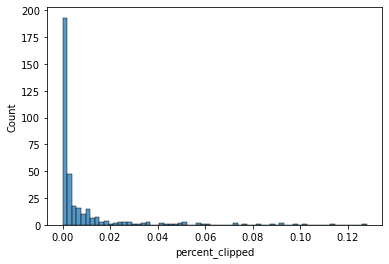

In [47]:
#look at how much clipped vocalizations are clipped
import seaborn as sns
%matplotlib inline
clipped = all_features.loc[all_features['percent_clipped'] != 0]
sns.histplot(clipped['percent_clipped'])

1.0091434591471333


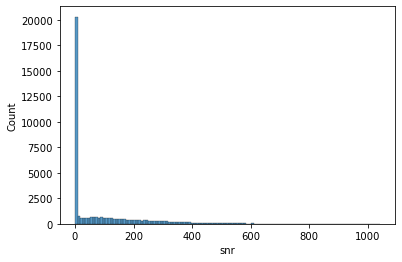

In [52]:
#look at signal to noise
not_clipped = all_features.loc[all_features['percent_clipped'] == 0]
sns.histplot(not_clipped['snr'])
print(min(not_clipped['snr']))

<AxesSubplot:xlabel='noise_floor', ylabel='Count'>

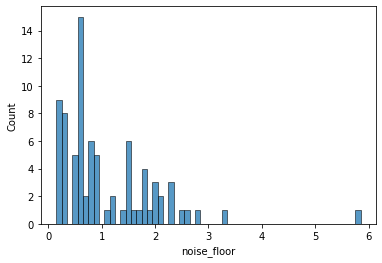

In [19]:
#look at noise floors calculated for each noise file
noise_floors_path = '/Volumes/LaCie/07_manuscript/audio/BW_noise_samples/all_noise_floors.csv'
nfdf = pd.read_csv(noise_floors_path)
sns.histplot(nfdf['noise_floor'], binwidth=0.1)

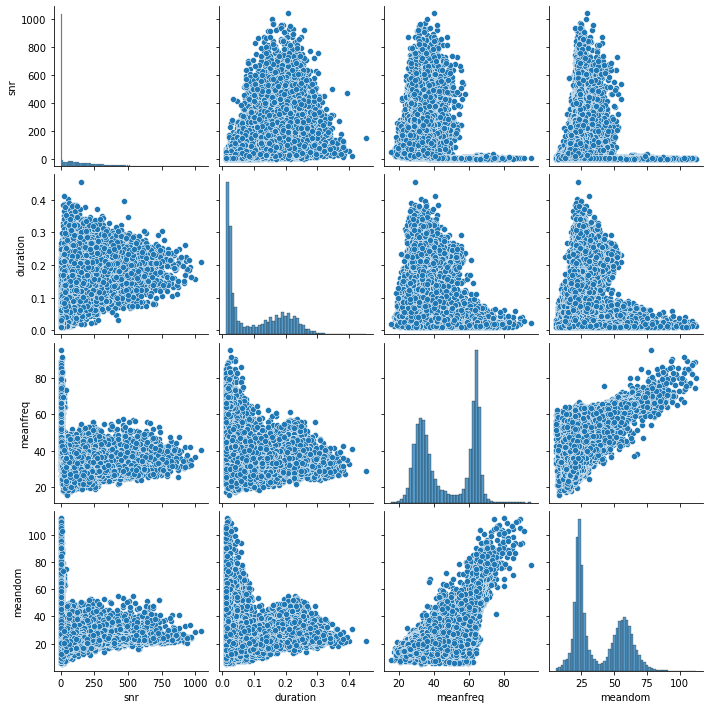

In [62]:
#look at some correlations
feats = ['snr', 'duration', 'meanfreq', 'meandom']
sns.pairplot(not_clipped[feats])

# spectrogramming and umap

## make spectrograms from wav clips you already have saved - amplitude segmentation

In [133]:
###### set the specotrogram parametes
#clips_dir = '/Volumes/LaCie/01_copies_for_analysis/single_voc_clips_ava/clips_by_species/BW_development_clips/'
#noise_floors_path = '/Volumes/LaCie/07_manuscript/audio/BW_noise_samples/all_noise_floors.csv'

segmenting_option = 'final/'

embedding_version = 'version5_1_20220817'
seg_df_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/amplitude_segmentation/'+segmenting_option+'all_predictions.csv'
seg_df = pd.read_csv(seg_df_path)

species = 'SW'
all_wav_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmentation/'+segmenting_option+'vocalization_clips/'
clips_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmentation/'+segmenting_option+'vocalization_clips/'+species+'/'
max_dur = float(np.max(seg_df['duration'].loc[seg_df['species'] == species]))
noise_floors_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/noise/all_noise_floors.csv'
print(max_dur)
#filtered_clips = [clips_dir+i for i  in os.listdir(clips_dir) if i not in list(df_subset['source_file'])]
#print(len(filtered_clips))

param_name = species+'_spec_params_128x128_'+embedding_version
spec_params = {
    'min_freq': 5000, # minimum frequency
    'max_freq': 125000, # maximum frequency
    'nperseg': 512, # FFT
    'noverlap': 512 // 4, # FFT
    'spec_min_val': 2, # minimum log-spectrogram value - update from noise floors dataframe if noise_floors_path provided
    'fs': 250000, # audio samplerate
    'downsample_by':2, #2 means take every other pixel from the original spectrogram
    'log_resize_scaling_factor':None, 
    'fill_value': .5,
    'max_duration':max_dur,
    'num_time_bins':128,
    'num_freq_bins':128,
    'spec_max_val':10,
    'interpolate':True, 
    'noise_floors_path':noise_floors_path  
}

# #save spec params
# if '00_params' not in os.listdir(all_wav_dir):
#    os.mkdir(all_wav_dir+'00_params')
# pd.DataFrame.from_dict(data=spec_params, orient='index').to_csv(all_wav_dir + '00_params/'+param_name, header=False)

#test run on 20 clips (set num_to_process to 'all' to do all of them)
specs_list, source_files = specs_from_wavs(clips_dir = clips_dir, 
                                      noise_floors_path=spec_params['noise_floors_path'], 
                                      species = species,
                                      noise_floor = None,
                                      spec_params=spec_params, 
                                      num_to_process = 'all', 
                                      filtered_clips = None, 
                                      interpolate=spec_params['interpolate'])


0.407551999999999
generating all specs from SW ...
processesing using the noise floors provided in noise_floors_path...
making spectrograms...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27289/27289 [01:52<00:00, 243.15it/s]

done.


## make spectrograms from wav clips you already have saved - das segmentation

In [93]:
# ###### set the specotrogram parametes
# #clips_dir = '/Volumes/LaCie/01_copies_for_analysis/single_voc_clips_ava/clips_by_species/BW_development_clips/'
# #noise_floors_path = '/Volumes/LaCie/07_manuscript/audio/BW_noise_samples/all_noise_floors.csv'

# segmenting_option = '20220905'

# embedding_version = 'version5_1_20220817'
# seg_df_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/das/00_predictions_files/20220831_all_predictions.csv'
# seg_df = pd.read_csv(seg_df_path)

# species = 'BW'
# #all_wav_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/das/'+segmenting_option+'/'+species
# clips_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/das/'+segmenting_option+'/'+species+'/'
# max_dur = float(np.max(seg_df['duration'].loc[seg_df['species'] == species]))
# noise_floors_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/noise/all_noise_floors.csv'
# print(max_dur)
# #filtered_clips = [clips_dir+i for i  in os.listdir(clips_dir) if i not in list(df_subset['source_file'])]
# #print(len(filtered_clips))

# #param_name = species+'_spec_params_128x128_'+embedding_version
# spec_params = {
#     'min_freq': 5000, # minimum frequency
#     'max_freq': 125000, # maximum frequency
#     'nperseg': 512, # FFT
#     'noverlap': 512 // 4, # FFT
#     'spec_min_val': .5, # minimum log-spectrogram value - update from noise floors dataframe if noise_floors_path provided
#     'fs': 250000, # audio samplerate
#     'downsample_by':2, #2 means take every other pixel from the original spectrogram
#     'log_resize_scaling_factor':None, 
#     'fill_value': .5,
#     'max_duration':max_dur,
#     'num_time_bins':128,
#     'num_freq_bins':128,
#     'spec_max_val':10,
#     'interpolate':True, 
#     'noise_floors_path':noise_floors_path
# }

# # #save spec params
# # if '00_params' not in os.listdir(all_wav_dir):
# #    os.mkdir(all_wav_dir+'00_params')
# # pd.DataFrame.from_dict(data=spec_params, orient='index').to_csv(all_wav_dir + '00_params/'+param_name, header=False)

# #test run on 20 clips (set num_to_process to 'all' to do all of them)
# specs_list, source_files = specs_from_wavs(clips_dir = clips_dir, 
#                                       noise_floors_path=spec_params['noise_floors_path'], 
#                                       species = species,
#                                       noise_floor = None,
#                                       spec_params=spec_params, 
#                                       num_to_process = 'all', 
#                                       filtered_clips = None, 
#                                       interpolate=spec_params['interpolate'])


8.199036
generating all specs from BW ...
processesing using the noise floors provided in noise_floors_path...
making spectrograms...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40405/40405 [02:31<00:00, 266.77it/s]


done.


## make spectrograms without individual wav clips 

In [134]:
# #clips_dir = '/Volumes/LaCie/01_copies_for_analysis/single_voc_clips_ava/clips_by_species/BW_development_clips/'
# seg_df_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/from_amplitude_threshold/option_5/all_predictions.csv'
# species = 'BW'
# seg_df = pd.read_csv(seg_df_path)
# max_dur = np.max(seg_df.loc[seg_df['species'] == 'BW'])

# spec_params = {
#     'min_freq': 5000, # minimum frequency
#     'max_freq': 124999, # maximum frequency
#     'nperseg': 256, # FFT
#     'noverlap': 256 // 4, # FFT
#     'spec_min_val': 0.5, # minimum log-spectrogram value - update from noise floors dataframe if noise_floors_path provided
#     'fs': 250000, # audio samplerate
#     'downsample_by':2, #2 means take every other pixel from the original spectrogram
#     'log_resize_scaling_factor':None, 
#     'fill_value': .5,
#     'max_duration':max_dur ,
#     'num_time_bins':128,
#     'num_freq_bins':128,
#     'spec_max_val':10
# }

# #test run on 20 clips (set num_to_process to 'all' to do all of them)
# specs_list, source_files = specs_from_segs(seg_df_path = seg_df_path,
#                                            raw_wavs_dir=all_wav_raw, 
#                                            spec_params=spec_params, 
#                                            num_to_process='all', 
#                                            species='BW', 
#                                            units= 's', 
#                                            interpolate=True)


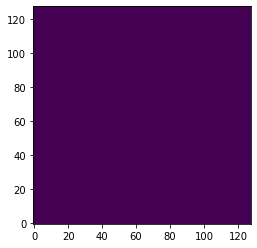

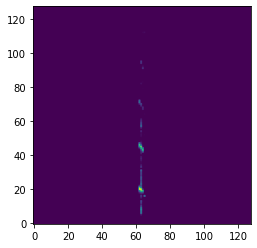

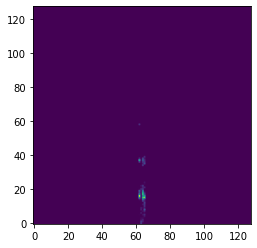

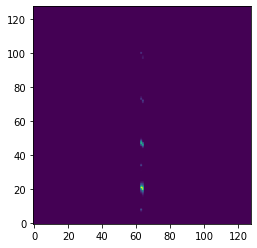

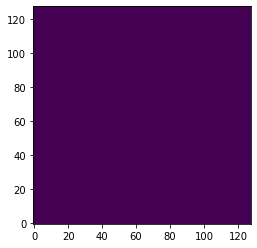

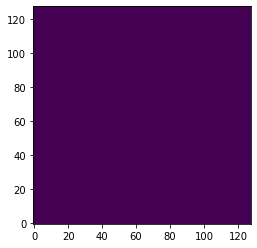

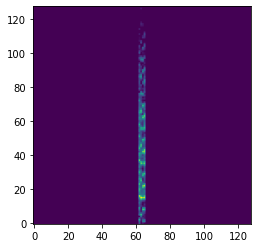

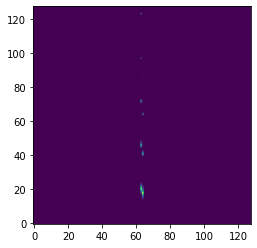

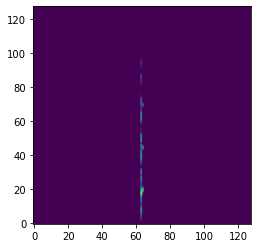

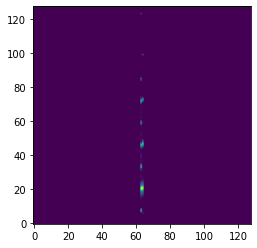

In [94]:
#spot check a sample of spectrograms
import random
import matplotlib.pyplot as plt
%matplotlib inline
num_to_sample = 10
samples = random.sample(range(len(specs_list[21:201])), num_to_sample)
for i in samples:
    plt.imshow(specs_list[i], origin = 'lower')
    plt.show()

## generate umap embeddings of spectrograms

In [136]:
#linearize
specs_lin = linearize_specs(specs_list)
del specs_list #free up space

shape of spectrograms array is: (27289, 128, 128)
linearizing spectrograms...
done.


In [137]:
#zscore
df_umap, zscored = zscore_specs(specs_lin[0], source_files)
#del specs_lin #free up space

z scoring...
done.


In [138]:
#embedd
umap1, umap2 = get_umap(zscored)

finding a umap embedding...
embedding took 223.42515063285828 seconds.


## plot umap

In [139]:
#load a umap if you want
#seg_option = 'option_6/'
#root_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/amplitude_segmentation/'
#df_umap = pd.read_feather(root_dir+seg_option+'umap_coordinates/'+'SW_42244x128x128_version2.feather')

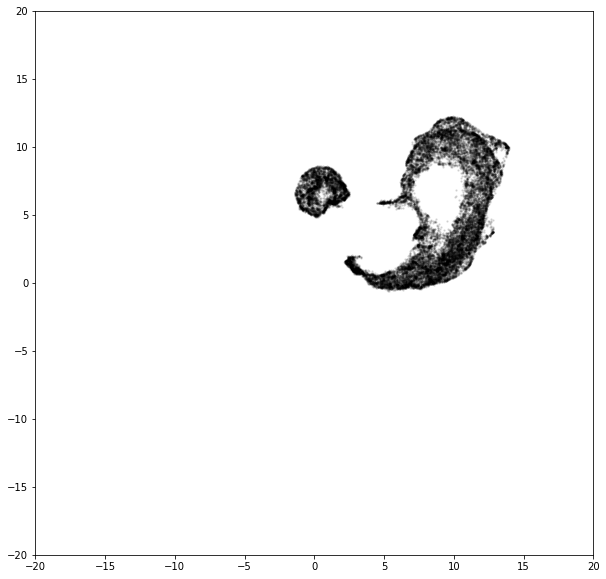

In [140]:
%matplotlib inline
import matplotlib.patches as patches

df_umap['umap1'] = umap1
df_umap['umap2'] = umap2

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
#rect = patches.Rectangle((9, 4), 2, 2, linewidth=2, edgecolor='r', facecolor='none')
#ax.add_patch(rect)

ax = plt.scatter(
    df_umap['umap1'],
    df_umap['umap2'],
    c = 'k',
    s = 2,
    alpha = .1, 
    cmap='viridis')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.show()


In [26]:
# source_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmentation/option_6/MU/'
# files = files_from_umap(frame = df_umap, 
#                    umap1_name='umap1',
#                    umap2_name='umap2',
#                    umap1_thresh=[9,11], 
#                    umap2_thresh=[4,6], 
#                    source_dir=source_dir)

# files = [i.split('/')[-1] for i in files]
# df_subset = df_umap.loc[df_umap['source_file'].isin(files)]

# show_specs(frame = df_subset, 
#            num_freq_bins=128, 
#            num_time_bins=128, 
#            columns_to_drop = ['source_file', 'umap1', 'umap2'])


In [229]:
#df_subset.to_csv('/n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/amplitude_segmentation/option_6/umap_coordinates/00_preprocessing/MU_corrupted_vocs_original_version5_umap.csv', index=False)


,0,1,2,3,4,5,6,7,8,9,...,16377,16378,16379,16380,16381,16382,16383,source_file,umap1,umap2
208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MU_31063x31066_ltr1_pup8_ch8_1600_m_338_253_fr...,10.026219,4.519186
728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MU_31063x31066_ltr1_pup8_ch8_1600_m_338_253_fr...,10.041887,4.494777
874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MU_31063x31066_ltr1_pup8_ch8_1600_m_338_253_fr...,10.348827,4.204764
935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MU_31064x31067_ltr1_pup1_ch1_3600_m_347_285_fr...,10.333821,4.200688
1428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MU_31063x31066_ltr1_pup8_ch8_1600_m_338_253_fr...,10.319725,4.231288


85


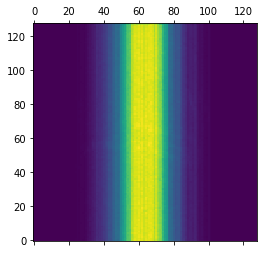

In [209]:
# spec_avg_from_umap(frame = df_umap, 
#                    umap1_name='umap1',
#                    umap2_name='umap2',
#                    umap1_thresh=[9,11], 
#                    umap2_thresh=[4,6], 
#                    num_freq_bins=128, 
#                    num_time_bins=128)

In [49]:
df_umap['source_file'].map(str)

,0,1,2,3,4,5,6,7,8,9,...,16377,16378,16379,16380,16381,16382,16383,source_file,umap1,umap2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SW_29542x30031_ltr1_pup1_ch2_1500_m_347_264_fr...,13.010020,7.780076
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SW_26823x26678_ltr2_pup1_ch2_6000_f_358_334_fr...,7.356224,1.751918
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SW_26823x26678_ltr3_pup2_ch3_7100_f_329_340_fr...,5.299778,7.248547
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SW_26823x26678_ltr1_pup1_ch2_8000_m_309_338_fr...,1.512682,8.920919
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SW_29542x30031_ltr1_pup4_ch5_1500_m_352_251_fr...,6.783099,8.747187


Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
               16375,         16376,         16377,         16378,
               16379,         16380,         16381,         16382,
               16383, 'source_file'],
      dtype='object', length=16385)

In [27]:
#file_format = '.feather'
segmenting_option = 'option_6_MZ_to_match/'
df_umap = df_umap.reset_index(drop=True)
coordinates_save_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/amplitude_segmentation/'+segmenting_option+'umap_coordinates/'
#coordinates_save_name = species + '_'+ str(shape[0]) + 'x' + str(shape[1]) + 'x' + str(shape[2]) + file_format
coordinates_save_name = 'MZ_11949x128x128_version5.feather'
save_name = coordinates_save_dir+coordinates_save_name
print(save_name)
df_umap.columns = df_umap.columns.map(str)
df_umap['umap1'] = umap1
df_umap['umap2'] = umap2
df_umap.to_feather(save_name)
print('done.')

/n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/amplitude_segmentation/option_6_MZ_to_match/umap_coordinates/MZ_11949x128x128_version5.feather
done.


## full pipeline from wav clip to umap coordinates: amplitude segmenting

params already exist for PO
generating all specs from PO ...
processesing using the noise floors provided in noise_floors_path...
making spectrograms...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10468/10468 [00:51<00:00, 202.44it/s]


done.
shape of spectrograms array is: (10468, 128, 128)
linearizing spectrograms...
done.
z scoring...
done.
finding a umap embedding...
embedding took 102.81310200691223 seconds.
plotting...
saving umap coordinates...
generating all specs from BW ...
processesing using the noise floors provided in noise_floors_path...
making spectrograms...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30130/30130 [02:45<00:00, 182.53it/s]


done.
shape of spectrograms array is: (30130, 128, 128)
linearizing spectrograms...
done.
z scoring...
done.
finding a umap embedding...
embedding took 270.4501760005951 seconds.
plotting...
saving umap coordinates...
generating all specs from BK ...
processesing using the noise floors provided in noise_floors_path...
making spectrograms...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42244/42244 [03:52<00:00, 181.52it/s]


done.
shape of spectrograms array is: (42244, 128, 128)
linearizing spectrograms...
done.
z scoring...
done.
finding a umap embedding...
embedding took 411.69171261787415 seconds.
plotting...
saving umap coordinates...
generating all specs from NB ...
processesing using the noise floors provided in noise_floors_path...
making spectrograms...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34079/34079 [03:24<00:00, 166.31it/s]


done.
shape of spectrograms array is: (34079, 128, 128)
linearizing spectrograms...
done.
z scoring...
done.
finding a umap embedding...
embedding took 319.6306483745575 seconds.
plotting...
saving umap coordinates...
generating all specs from SW ...
processesing using the noise floors provided in noise_floors_path...
making spectrograms...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27289/27289 [02:20<00:00, 193.57it/s]


done.
shape of spectrograms array is: (27289, 128, 128)
linearizing spectrograms...
done.
z scoring...
done.
finding a umap embedding...
embedding took 197.90014576911926 seconds.
plotting...
saving umap coordinates...
generating all specs from LO ...
processesing using the noise floors provided in noise_floors_path...
making spectrograms...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19429/19429 [01:32<00:00, 209.97it/s]


done.
shape of spectrograms array is: (19429, 128, 128)
linearizing spectrograms...
done.
z scoring...
done.
finding a umap embedding...
embedding took 120.39824843406677 seconds.
plotting...
saving umap coordinates...
generating all specs from GO ...
processesing using the noise floors provided in noise_floors_path...
making spectrograms...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66868/66868 [05:59<00:00, 185.76it/s]


done.
shape of spectrograms array is: (66868, 128, 128)
linearizing spectrograms...
done.
z scoring...
done.
finding a umap embedding...
embedding took 554.200133562088 seconds.
plotting...
saving umap coordinates...
generating all specs from LL ...
processesing using the noise floors provided in noise_floors_path...
making spectrograms...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18371/18371 [01:35<00:00, 192.83it/s]


done.
shape of spectrograms array is: (18371, 128, 128)
linearizing spectrograms...
done.
z scoring...
done.
finding a umap embedding...
embedding took 137.20946741104126 seconds.
plotting...
saving umap coordinates...
generating all specs from IS ...
processesing using the noise floors provided in noise_floors_path...
making spectrograms...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3755/3755 [00:22<00:00, 166.95it/s]


done.
shape of spectrograms array is: (3755, 128, 128)
linearizing spectrograms...
done.
z scoring...
done.
finding a umap embedding...
embedding took 77.02693462371826 seconds.
plotting...
saving umap coordinates...
generating all specs from MU ...
processesing using the noise floors provided in noise_floors_path...
making spectrograms...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26628/26628 [01:57<00:00, 227.38it/s]


done.
shape of spectrograms array is: (26628, 128, 128)
linearizing spectrograms...
done.
z scoring...
done.
finding a umap embedding...
embedding took 243.1016504764557 seconds.
plotting...
saving umap coordinates...


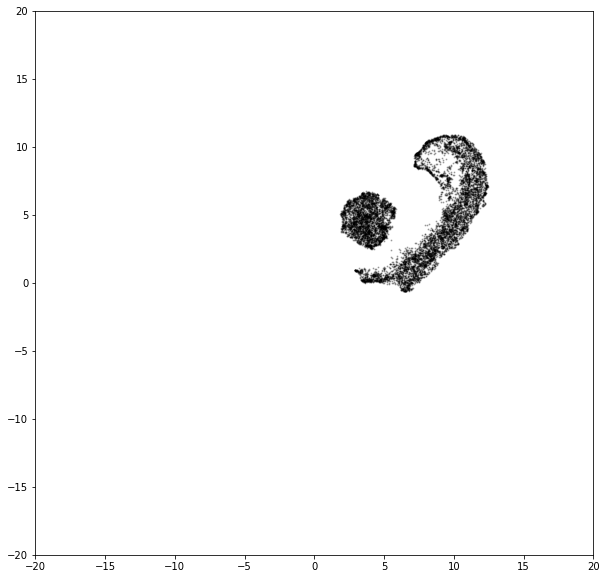

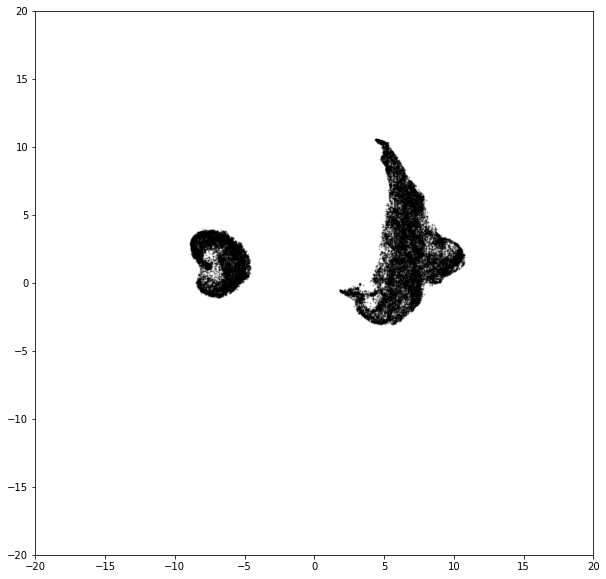

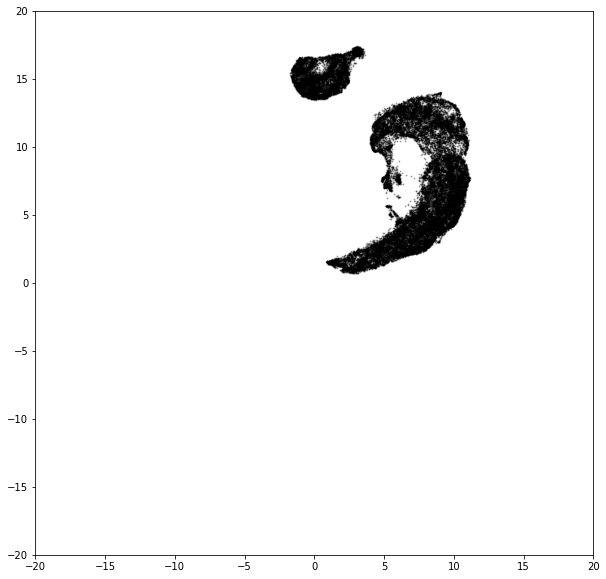

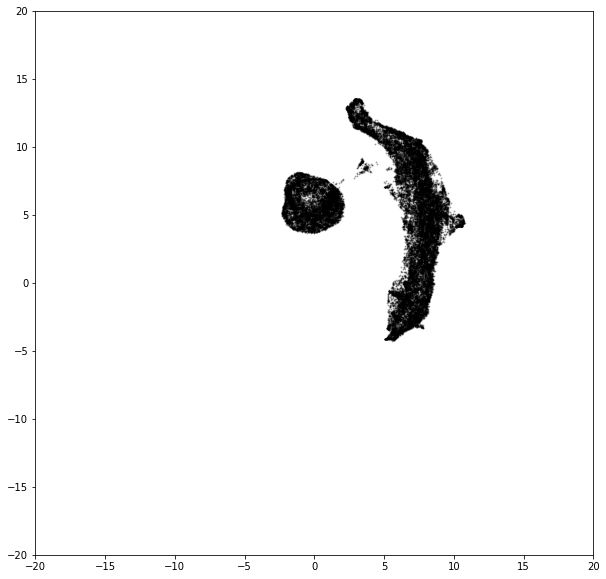

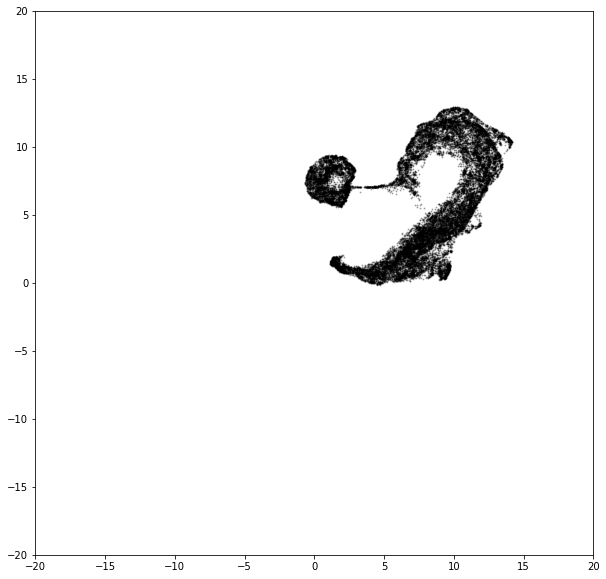

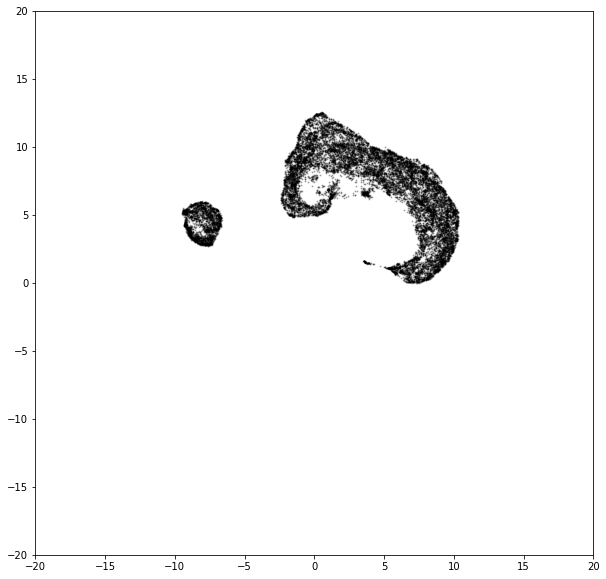

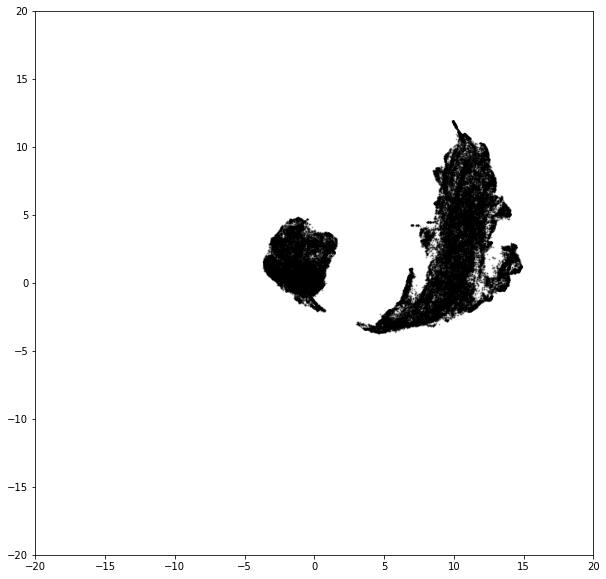

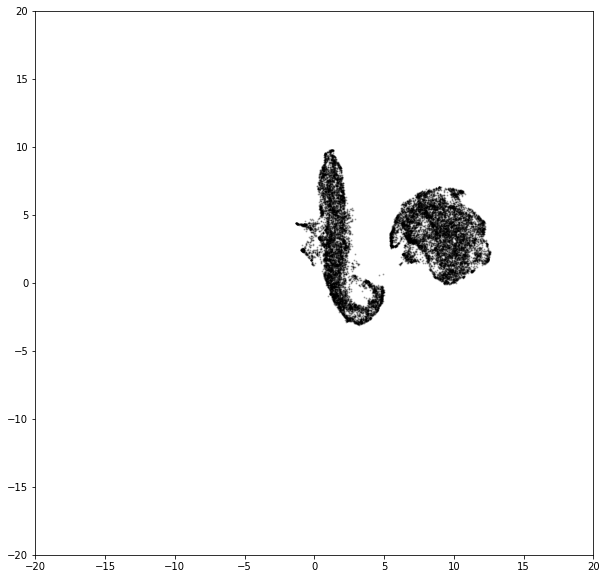

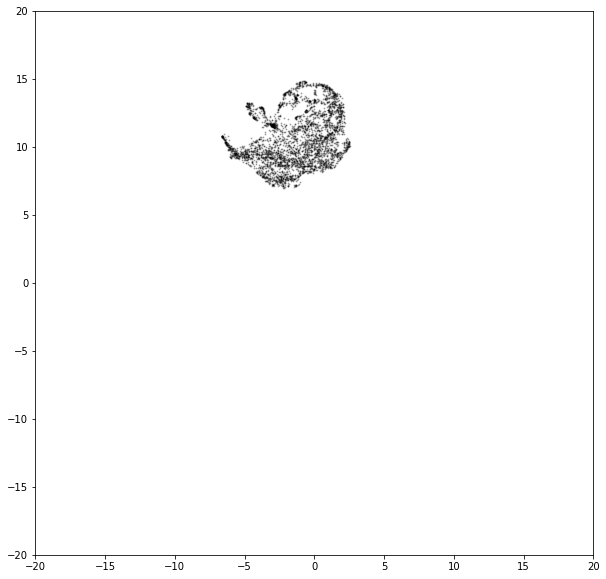

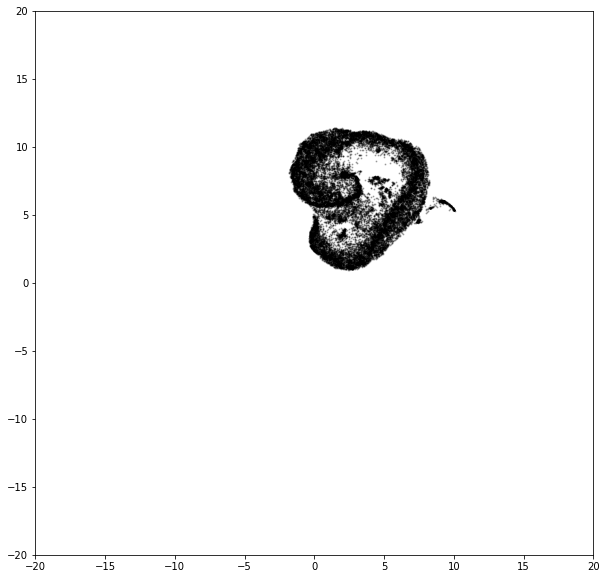

In [100]:
# species_list = ['PO','BW', 'BK', 'NB', 'SW', 'LO', 'GO', 'LL', 'IS', 'MU']

# segmenting_option = 'test/'
# version='version_5_20220817_redo'
# seg_df_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/amplitude_segmentation/'+segmenting_option+'all_predictions.csv'
# seg_df = pd.read_csv(seg_df_path)
# all_wav_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmentation/'+segmenting_option
# specs_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/amplitude_segmentation/'+segmenting_option
# noise_floors_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/noise/all_noise_floors.csv'

# for s in species_list:
    
    
#     param_name = s+'_spec_params_128x128_interoplate_'+version
#     clips_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmentation/'+segmenting_option+s+'/'
#     max_dur = float(np.max(seg_df['duration'].loc[seg_df['species'] == s]))
    
#     spec_params = {
#         'min_freq': 5000, # minimum frequency
#         'max_freq': 125000, # maximum frequency
#         'nperseg': 512, # FFT
#         'noverlap': 512 // 4, # FFT
#         'spec_min_val': .5, # minimum log-spectrogram value - update from noise floors dataframe if noise_floors_path provided
#         'fs': 250000, # audio samplerate
#         'downsample_by':2, #2 means take every other pixel from the original spectrogram
#         'log_resize_scaling_factor':None, 
#         'fill_value': .5,
#         'max_duration':max_dur,
#         'num_time_bins':128,
#         'num_freq_bins':128,
#         'spec_max_val':10,
#         'interpolate':True,
#         'noise_floors_path':noise_floors_path
#     }

#     #save spec params
#     if '00_params' not in os.listdir(specs_dir):
#         os.mkdir(specs_dir+'00_params')
#     if param_name not in os.listdir(specs_dir+'00_params'):
#         pd.DataFrame.from_dict(data=spec_params, orient='index').to_csv(specs_dir + '00_params/'+param_name, header=False)
#     else:
#         print('params already exist for', s)

#     wavs_to_umap(clips_dir=clips_dir, 
#                  noise_floors_path = spec_params['noise_floors_path'],
#                  species = s, 
#                  noise_floor = None, 
#                  spec_params = spec_params, 
#                  num_to_process = 'all', 
#                  filtered_clips = None, 
#                  interpolate = spec_params['interpolate'], 
#                  segmenting_option=segmenting_option, 
#                  version=version)

## full pipeline from wav clip to umap coordinates: das segmenting

In [16]:
#this is the date you generated the wav clips
clips_date='20221003'

#this is the date that will be associated with the umap embeddings made below
umap_date='20221004'

#confirm things are as they should be
print('umap date is:', umap_date)
print('clips date is:', clips_date)
print('modeling_strategy is:', modeling_strategy)
print('iteration is:', iteration)

umap date is: 20221004
clips date is: 20221003
modeling_strategy is: 1model1species
iteration is: iteration1


### set parameters and save

In [19]:
#write the spec params

#set the species to process
species_list = ['PO','BW', 'BK', 'NB', 'SW', 'LO', 'GO', 'LL', 'MU', 'MZ']

#set paths TODO: move these to a paths.py file once finalized
wav_save_root = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/das/'
all_wav_dir = wav_save_root+clips_dir+'/'
specs_dir_root = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/das/'
noise_floors_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/noise/all_noise_floors.csv'
data_for_umap = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/das/00_predictions_files/1model1species_20221003_all_species_iteration1.csv'
assert data_for_umap == source_data_path

#load the segments and drop the noise
seg_df = pd.read_csv(data_for_umap)
seg_df = seg_df.loc[seg_df['voc_name'] != 'noise']

#choose which directory of wav clips to use and make sure it exists
clips_version_name = ('_').join([clips_date,modeling_strategy,iteration])
assert clips_version_name in os.listdir(wav_save_root)


#make necessary directories for spectrograms
spec_version_name = ('_').join([umap_date,modeling_strategy,iteration])
specs_dir = os.path.join(specs_dir_root,spec_version_name)+'/'
if spec_version_name not in os.listdir(specs_dir_root):
    os.mkdir(specs_dir)
    print('made a root directory to store umap embeddings from this version_name:\t\n', specs_dir, '\n')

if '00_params' not in os.listdir(specs_dir):
    os.mkdir(specs_dir+'00_params')
    print('made a params directory to store umap embeddings from this version_name:\t\n', specs_dir+'00_params\n')

#write the params dictionaries for each species
for species in species_list:
    param_name = ('_').join([species,'spec_params_128x128',version_name])
    wav_clips_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/das/'+version_name+'/'+species+'/'
    max_dur = float(np.max(seg_df['duration'].loc[seg_df['species'] == species]))
    print('longest predicted voc from', species, 'is', max_dur, 'seconds')

    spec_params = {
        'species': species,
        'min_freq': 20000, # minimum frequency
        'max_freq': 125000, # maximum frequency
        'nperseg': 1024, # FFT
        'noverlap': 1024 // 4, # FFT
        'spec_min_val': .5, # minimum log-spectrogram value - update from noise floors dataframe if noise_floors_path provided
        'fs': 250000, # audio samplerate
        'downsample_by':2, #2 means take every other pixel from the original spectrogram - ignored if interpolate=True
        'log_resize_scaling_factor':None, 
        'fill_value': .5,
        'max_duration':max_dur,
        'num_time_bins':128,
        'num_freq_bins':128,
        'spec_max_val':10,
        'interpolate':True,
        'wav_clips_source':wav_clips_dir,
        'noise_floors_path':None
    }

    #save spec params
    if param_name not in os.listdir(specs_dir+'00_params'):
        save_parameters(spec_params, specs_dir+'00_params/', param_name)
    else:
        print('params already exist:', os.path.join(specs_dir+'00_params/', param_name))

longest predicted voc from PO is 0.4250199999999999 seconds
This file already exists in save_dir: PO_spec_params_128x128_20221003_1model1species_iteration1
overwrite? y/nn
ok - no file saved
longest predicted voc from BW is 0.4586839999999483 seconds
This file already exists in save_dir: BW_spec_params_128x128_20221003_1model1species_iteration1
overwrite? y/nn
ok - no file saved
longest predicted voc from BK is 0.5171799999999962 seconds
This file already exists in save_dir: BK_spec_params_128x128_20221003_1model1species_iteration1
overwrite? y/nn
ok - no file saved
longest predicted voc from NB is 0.5734360000000001 seconds
This file already exists in save_dir: NB_spec_params_128x128_20221003_1model1species_iteration1
overwrite? y/nn
ok - no file saved
longest predicted voc from SW is 0.4618840000000048 seconds
This file already exists in save_dir: SW_spec_params_128x128_20221003_1model1species_iteration1
overwrite? y/nn
ok - no file saved
longest predicted voc from LO is 0.3290200000

### get the embedding coordinates and save

##########################################################################
PO
##########################################################################
getting umap embedding from wav clips here.......

 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/das/20221003_1model1species_iteration1/PO/ 

using these parameters..............

 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/das/20221004_1model1species_iteration1/00_params/PO_spec_params_128x128_20221003_1model1species_iteration1 

and saving umap coordinates here.......

 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/das/20221004_1model1species_iteration1/ 

14473 vocalization clips will be written to wav files
##########################################################################
BW
##########################################################################
getting umap embedding from wav clips here.......

 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/c

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13880/13880 [01:17<00:00, 178.94it/s]


done.
shape of spectrograms array is: (13880, 128, 128)
linearizing spectrograms...
done.
(13880, 128, 128)
z scoring...
done.
finding a umap embedding...
embedding took 122.4597556591034 seconds.
plotting...
saving umap coordinates...
loading parameters...
loaded parameters from:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/das/20221004_1model1species_iteration1/00_params/BW_spec_params_128x128_20221003_1model1species_iteration1
done.
getting paths to wav clips...
done.
getting umap embeddings...
generating specs from the paths in the list filtered_clips...
making spectrograms...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39195/39195 [04:17<00:00, 152.37it/s]


done.
shape of spectrograms array is: (39195, 128, 128)
linearizing spectrograms...
done.
(39195, 128, 128)
z scoring...
done.
finding a umap embedding...
embedding took 486.98182702064514 seconds.
plotting...
saving umap coordinates...
loading parameters...
loaded parameters from:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/das/20221004_1model1species_iteration1/00_params/BK_spec_params_128x128_20221003_1model1species_iteration1
done.
getting paths to wav clips...
done.
getting umap embeddings...
generating specs from the paths in the list filtered_clips...
making spectrograms...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50741/50741 [05:37<00:00, 150.14it/s]


done.
shape of spectrograms array is: (50741, 128, 128)
linearizing spectrograms...
done.
(50741, 128, 128)
z scoring...
done.
finding a umap embedding...
embedding took 792.6306264400482 seconds.
plotting...
saving umap coordinates...
loading parameters...
loaded parameters from:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/das/20221004_1model1species_iteration1/00_params/NB_spec_params_128x128_20221003_1model1species_iteration1
done.
getting paths to wav clips...
done.
getting umap embeddings...
generating specs from the paths in the list filtered_clips...
making spectrograms...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39227/39227 [05:42<00:00, 114.49it/s]


done.
shape of spectrograms array is: (39227, 128, 128)
linearizing spectrograms...
done.
(39227, 128, 128)
z scoring...
done.
finding a umap embedding...
embedding took 552.1579821109772 seconds.
plotting...
saving umap coordinates...
loading parameters...
loaded parameters from:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/das/20221004_1model1species_iteration1/00_params/SW_spec_params_128x128_20221003_1model1species_iteration1
done.
getting paths to wav clips...
done.
getting umap embeddings...
generating specs from the paths in the list filtered_clips...
making spectrograms...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34747/34747 [03:30<00:00, 165.01it/s]


done.
shape of spectrograms array is: (34747, 128, 128)
linearizing spectrograms...
done.
(34747, 128, 128)
z scoring...
done.
finding a umap embedding...
embedding took 412.00444650650024 seconds.
plotting...
saving umap coordinates...
loading parameters...
loaded parameters from:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/das/20221004_1model1species_iteration1/00_params/LO_spec_params_128x128_20221003_1model1species_iteration1
done.
getting paths to wav clips...
done.
getting umap embeddings...
generating specs from the paths in the list filtered_clips...
making spectrograms...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25933/25933 [02:18<00:00, 187.02it/s]


done.
shape of spectrograms array is: (25933, 128, 128)
linearizing spectrograms...
done.
(25933, 128, 128)
z scoring...
done.
finding a umap embedding...
embedding took 257.3743224143982 seconds.
plotting...
saving umap coordinates...
loading parameters...
loaded parameters from:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/das/20221004_1model1species_iteration1/00_params/GO_spec_params_128x128_20221003_1model1species_iteration1
done.
getting paths to wav clips...
done.
getting umap embeddings...
generating specs from the paths in the list filtered_clips...
making spectrograms...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74682/74682 [07:51<00:00, 158.37it/s]


done.
shape of spectrograms array is: (74682, 128, 128)
linearizing spectrograms...
done.
(74682, 128, 128)
z scoring...
done.
finding a umap embedding...
embedding took 974.2195048332214 seconds.
plotting...
saving umap coordinates...
loading parameters...
loaded parameters from:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/das/20221004_1model1species_iteration1/00_params/LL_spec_params_128x128_20221003_1model1species_iteration1
done.
getting paths to wav clips...
done.
getting umap embeddings...
generating specs from the paths in the list filtered_clips...
making spectrograms...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45725/45725 [03:50<00:00, 198.34it/s]


done.
shape of spectrograms array is: (45725, 128, 128)
linearizing spectrograms...
done.
(45725, 128, 128)
z scoring...
done.
finding a umap embedding...
embedding took 311.5516755580902 seconds.
plotting...
saving umap coordinates...
loading parameters...
loaded parameters from:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/das/20221004_1model1species_iteration1/00_params/MU_spec_params_128x128_20221003_1model1species_iteration1
done.
getting paths to wav clips...
done.
getting umap embeddings...
generating specs from the paths in the list filtered_clips...
making spectrograms...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36593/36593 [02:50<00:00, 214.61it/s]


done.
shape of spectrograms array is: (36593, 128, 128)
linearizing spectrograms...
done.
(36593, 128, 128)
z scoring...
done.
finding a umap embedding...
embedding took 534.291889667511 seconds.
plotting...
saving umap coordinates...
loading parameters...
loaded parameters from:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/das/20221004_1model1species_iteration1/00_params/MZ_spec_params_128x128_20221003_1model1species_iteration1
done.
getting paths to wav clips...
done.
getting umap embeddings...
generating specs from the paths in the list filtered_clips...
making spectrograms...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11360/11360 [00:57<00:00, 197.15it/s]


done.
shape of spectrograms array is: (11360, 128, 128)
linearizing spectrograms...
done.
(11360, 128, 128)
z scoring...
done.
finding a umap embedding...
embedding took 106.67799663543701 seconds.
plotting...
saving umap coordinates...


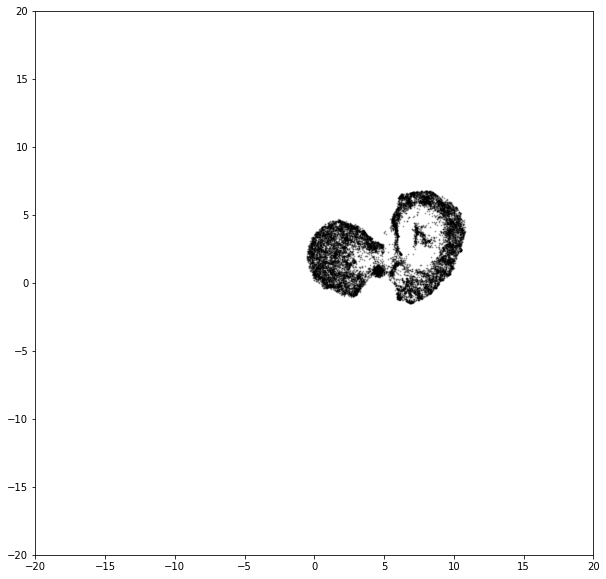

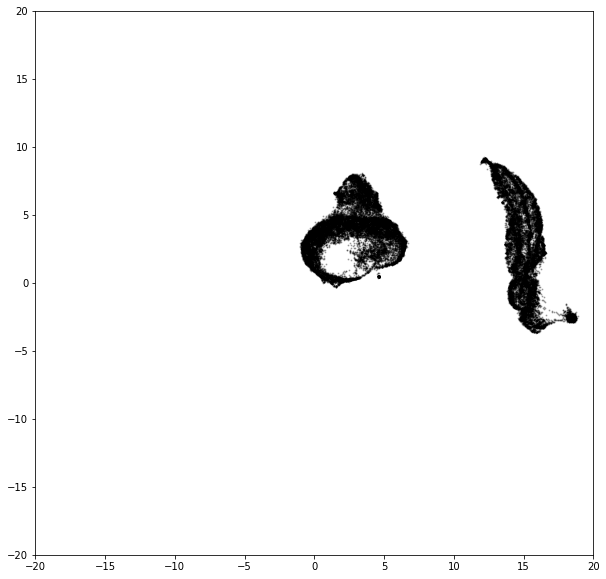

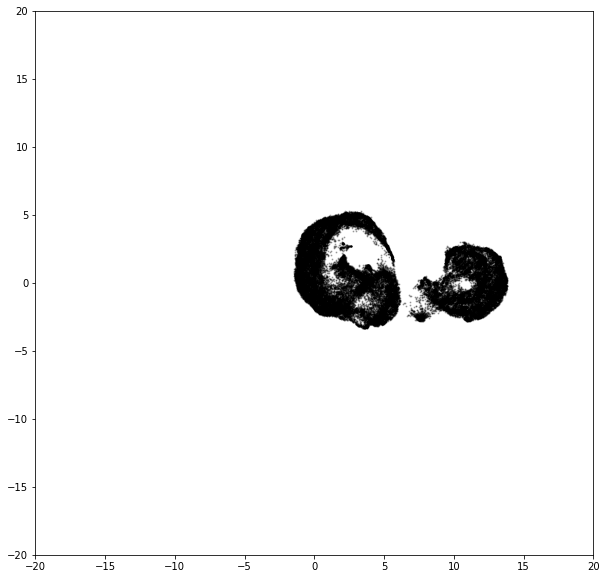

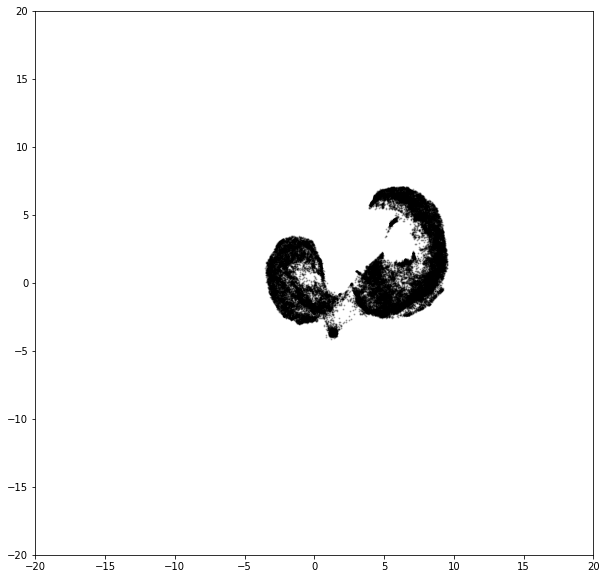

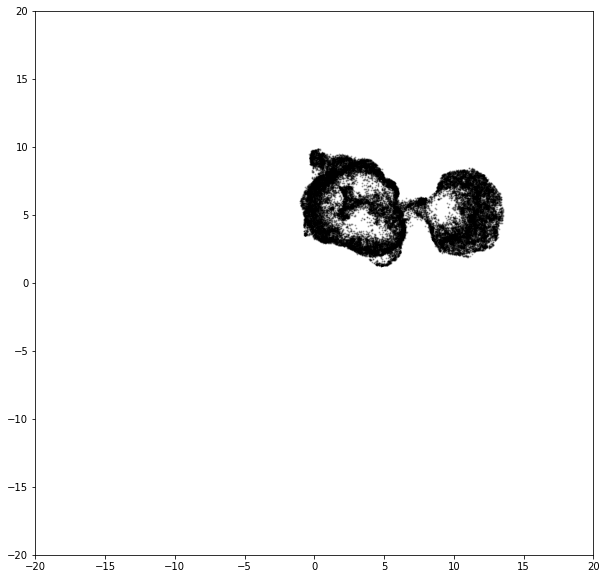

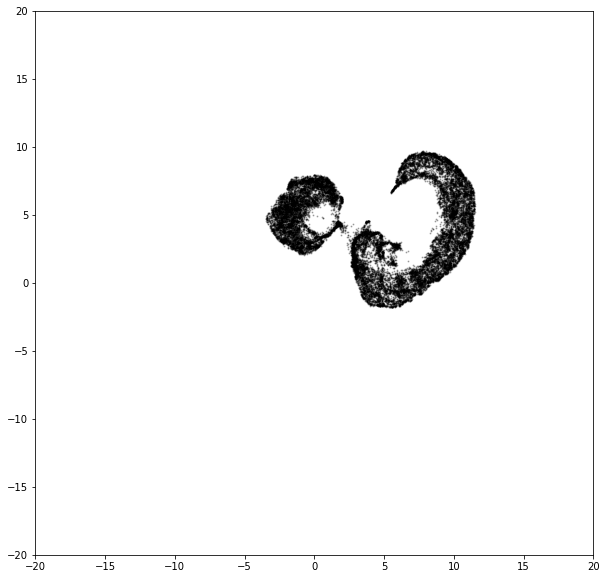

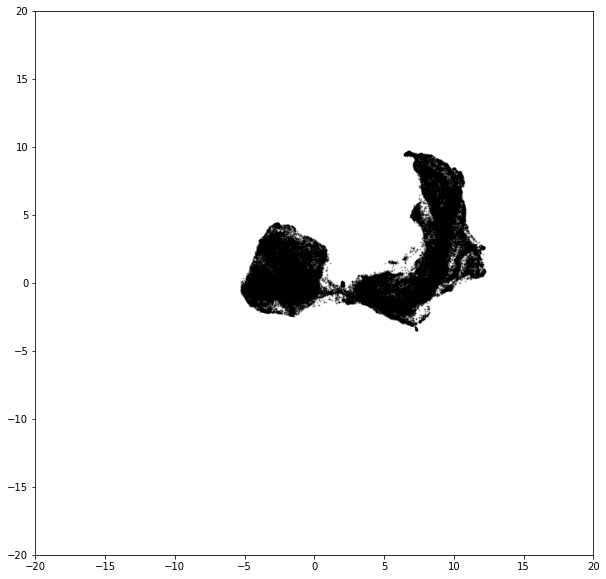

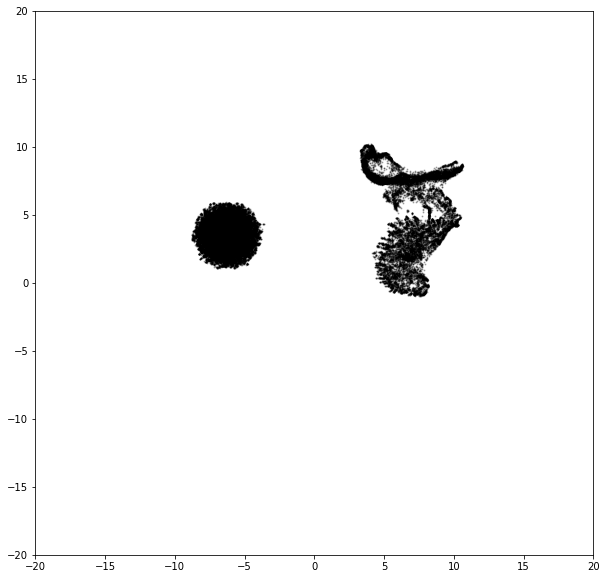

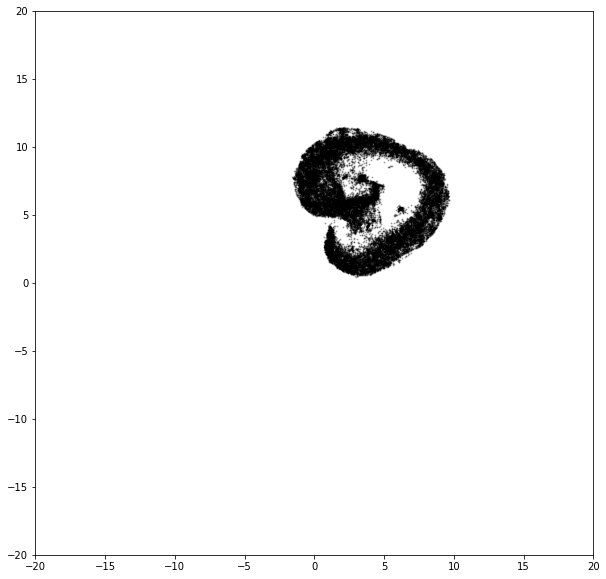

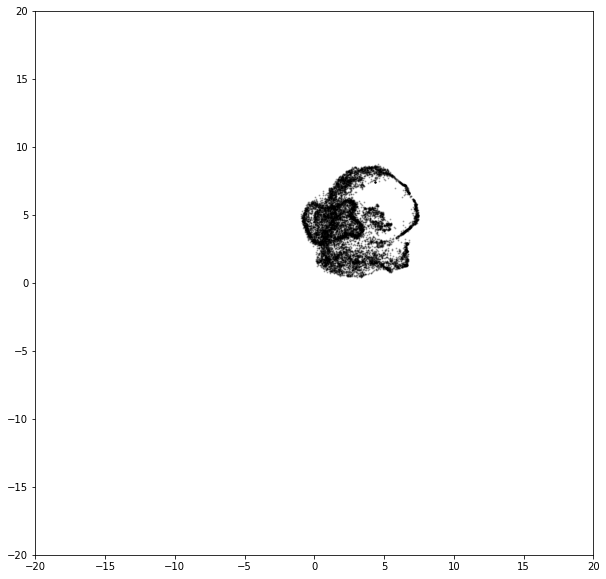

In [26]:
#set the directory for saving and make it TODO - get the data from datetime

for species in species_list:
    print('##########################################################################')
    wav_clips_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/das/'+version_name+'/'+species+'/'
    param_name = ('_').join([species,'spec_params_128x128',version_name])
    print(species)
    print('##########################################################################')
    print('getting umap embedding from wav clips here.......\n\n',wav_clips_dir ,'\n')
    print('using these parameters..............\n\n', os.path.join(specs_dir+'00_params/', param_name), '\n')
    print('and saving umap coordinates here.......\n\n',specs_dir,'\n')
    print(len(source_data.loc[source_data['species'] == species]), 'vocalization clips will be written to wav files')
    
val = input('continue?' 'y/n')

assert val in ['y', 'n']

if val == 'n':
    print('ok - doing nothing.')

elif val == 'y':
    
    for species in species_list:
        params_dir = specs_dir+'00_params/'
        params_name = species+'_spec_params_128x128_'+version_name
        
        #load the spec params
        print('loading parameters...')
        spec_params = load_parameters(params_dir, params_name)
        print('done.')
        
        #get the clips for the embedding (excluding noise)
        print('getting paths to wav clips...')
        clips_to_process = [i for i in glob.glob(spec_params['wav_clips_source']+'*.wav') if 'noise' not in i]
        print('done.')
        
        #make sure you have one species and there are no noise clips in here
        assert set([os.path.split(i)[-1].split('_')[0] for i in clips_to_process])
        if species in ['MU', 'MZ']: assert set([i.split('_')[-1] for i in clips_to_process]) == {'whistle.wav'}
        else: assert set([i.split('_')[-1] for i in clips_to_process]) == {'cry.wav','whistle.wav'}

        #make the umap
        print('getting umap embeddings...')
        wavs_to_umap(clips_dir=None, 
                     noise_floors_path = spec_params['noise_floors_path'],
                     species = None, 
                     noise_floor = spec_params['spec_min_val'], 
                     spec_params = spec_params, 
                     num_to_process = 'all', 
                     filtered_clips = clips_to_process, 
                     interpolate = spec_params['interpolate'], 
                     segmenting_option=None, 
                     version=version_name, 
                     save_root = specs_dir)

In [3]:
seg_df = pd.read_csv('/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/amplitude_segmentation/final_segments/all_predictions.csv')
species_list = ['BK', 'BW', 'MU', 'NB', 'IS', 'SW', 'LL', 'GO', 'LO', 'PO', 'MZ']
for s in species_list:
    print(s, ':', len(seg_df.loc[seg_df['species'] == s]))

BK : 42244
BW : 30130
MU : 26628
NB : 34079
IS : 3755
SW : 27289
LL : 18371
GO : 66868
LO : 19429
PO : 10468
MZ : 11949


In [22]:
species = ['BK', 'BW', 'MU', 'NB', 'IS', 'SW', 'LL', 'GO', 'LO', 'PO', 'MZ']
root = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/'
rest = '/amplitude_segmentation/archive/option_6_redo/'
path = root+rest
#combine_predictions(path, path)
df = pd.read_csv(path+'all_predictions.csv')

for s in species:
    print(s,':',len(df.loc[df['species'] == s]))

BK : 42244
BW : 30130
MU : 26628
NB : 34079
IS : 3755
SW : 27289
LL : 18371
GO : 66868
LO : 19429
PO : 10468
MZ : 131
